<a href="https://colab.research.google.com/github/psmouli14/final_project/blob/main/mini_imagenet_prototype_reptile.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import glob
from PIL import Image
import pandas as pd
import numpy as np
import tensorflow as tf

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving mini-imagenet.tar.gz to mini-imagenet.tar.gz


In [ ]:
!tar -zxvf mini-imagenet.tar.gz

mini-imagenet-cache-train.pkl
mini-imagenet-cache-val.pkl
mini-imagenet-cache-test.pkl


In [ ]:
def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        cifar_dict = pickle.load(fo, encoding='bytes')
    return cifar_dict

In [ ]:
train = unpickle('mini-imagenet-cache-train.pkl')
val = unpickle('mini-imagenet-cache-val.pkl')
test = unpickle('mini-imagenet-cache-test.pkl')

In [ ]:
val_keys = list(val.keys())
val_keys

['image_data', 'class_dict']

In [ ]:
training_keys = list(train.keys())
training_keys

['image_data', 'class_dict']

In [ ]:
test_keys = list(test.keys())
test_keys

['image_data', 'class_dict']

In [ ]:
train_images = train['image_data']
train_labels = train['class_dict']
test_images = test['image_data']
test_labels = test['class_dict']
val_images = val['image_data']
val_labels = val['class_dict']
print(train_images.shape)
print(val_images.shape)
print(test_images.shape)
print(type(train_labels))
print(train_labels.keys())
print(val_labels.keys())
print(test_labels.keys())

train_classes = len(train_labels.keys())
val_classes = len(val_labels.keys())
test_classes = len(test_labels.keys())
print(train_classes)
print(val_classes)
print(test_classes)


(38400, 84, 84, 3)
(9600, 84, 84, 3)
(12000, 84, 84, 3)
<class 'dict'>
dict_keys(['n01532829', 'n01558993', 'n01704323', 'n01749939', 'n01770081', 'n01843383', 'n01910747', 'n02074367', 'n02089867', 'n02091831', 'n02101006', 'n02105505', 'n02108089', 'n02108551', 'n02108915', 'n02111277', 'n02113712', 'n02120079', 'n02165456', 'n02457408', 'n02606052', 'n02687172', 'n02747177', 'n02795169', 'n02823428', 'n02966193', 'n03017168', 'n03047690', 'n03062245', 'n03207743', 'n03220513', 'n03337140', 'n03347037', 'n03400231', 'n03476684', 'n03527444', 'n03676483', 'n03838899', 'n03854065', 'n03888605', 'n03908618', 'n03924679', 'n03998194', 'n04067472', 'n04243546', 'n04251144', 'n04258138', 'n04275548', 'n04296562', 'n04389033', 'n04435653', 'n04443257', 'n04509417', 'n04515003', 'n04596742', 'n04604644', 'n04612504', 'n06794110', 'n07584110', 'n07697537', 'n07747607', 'n09246464', 'n13054560', 'n13133613'])
dict_keys(['n01855672', 'n02091244', 'n02114548', 'n02138441', 'n02174001', 'n0295082

In [ ]:
train_images.dtype

dtype('uint8')

In [ ]:
train_images[0]

array([[[ 93, 146, 198],
        [ 93, 146, 198],
        [ 92, 145, 197],
        ...,
        [ 94, 146, 196],
        [ 94, 146, 196],
        [ 94, 145, 198]],

       [[ 93, 146, 196],
        [ 94, 147, 197],
        [ 93, 146, 196],
        ...,
        [ 96, 148, 198],
        [ 94, 146, 196],
        [ 97, 148, 201]],

       [[ 93, 147, 194],
        [ 91, 145, 192],
        [ 93, 147, 194],
        ...,
        [ 94, 146, 196],
        [ 94, 146, 196],
        [ 94, 148, 200]],

       ...,

       [[ 30,  26,  39],
        [123, 166, 202],
        [105, 153, 200],
        ...,
        [100, 150, 199],
        [100, 150, 199],
        [102, 152, 201]],

       [[ 26,  49,  54],
        [102, 166, 228],
        [106, 153, 204],
        ...,
        [100, 150, 199],
        [102, 152, 201],
        [ 96, 146, 195]],

       [[125, 168, 203],
        [101, 154, 204],
        [ 98, 152, 202],
        ...,
        [100, 150, 202],
        [101, 151, 202],
        [102, 152, 201]]

In [ ]:
train_images = tf.cast(train_images, tf.float32)
train_images.shape
train_images[0]

<tf.Tensor: shape=(84, 84, 3), dtype=float32, numpy=
array([[[ 93., 146., 198.],
        [ 93., 146., 198.],
        [ 92., 145., 197.],
        ...,
        [ 94., 146., 196.],
        [ 94., 146., 196.],
        [ 94., 145., 198.]],

       [[ 93., 146., 196.],
        [ 94., 147., 197.],
        [ 93., 146., 196.],
        ...,
        [ 96., 148., 198.],
        [ 94., 146., 196.],
        [ 97., 148., 201.]],

       [[ 93., 147., 194.],
        [ 91., 145., 192.],
        [ 93., 147., 194.],
        ...,
        [ 94., 146., 196.],
        [ 94., 146., 196.],
        [ 94., 148., 200.]],

       ...,

       [[ 30.,  26.,  39.],
        [123., 166., 202.],
        [105., 153., 200.],
        ...,
        [100., 150., 199.],
        [100., 150., 199.],
        [102., 152., 201.]],

       [[ 26.,  49.,  54.],
        [102., 166., 228.],
        [106., 153., 204.],
        ...,
        [100., 150., 199.],
        [102., 152., 201.],
        [ 96., 146., 195.]],

       [[125., 168.

In [ ]:
test_images = tf.cast(test_images, tf.float32)
test_images.shape
test_images = test_images/255
test_images[0]

<tf.Tensor: shape=(84, 84, 3), dtype=float32, numpy=
array([[[0.78431374, 0.9490196 , 0.9411765 ],
        [0.8       , 0.92156863, 0.9764706 ],
        [0.7921569 , 0.92156863, 0.98039216],
        ...,
        [0.8235294 , 0.87058824, 0.93333334],
        [0.80784315, 0.85882354, 0.9098039 ],
        [0.85490197, 0.8980392 , 0.92941177]],

       [[0.5411765 , 0.78431374, 0.90588236],
        [0.57254905, 0.78431374, 0.972549  ],
        [0.5176471 , 0.75686276, 0.9490196 ],
        ...,
        [0.72156864, 0.8666667 , 0.96862745],
        [0.7294118 , 0.87058824, 0.95686275],
        [0.7647059 , 0.90588236, 0.98039216]],

       [[0.45490196, 0.68235296, 0.8509804 ],
        [0.5176471 , 0.7294118 , 0.972549  ],
        [0.5058824 , 0.7607843 , 0.9882353 ],
        ...,
        [0.6862745 , 0.8117647 , 0.96862745],
        [0.6784314 , 0.8117647 , 0.9607843 ],
        [0.69803923, 0.83137256, 0.972549  ]],

       ...,

       [[0.91764706, 0.99607843, 0.99215686],
        [0.9137

In [ ]:
val_images = tf.cast(val_images, tf.float32)
val_images = val_images/255
val_images[0]

<tf.Tensor: shape=(84, 84, 3), dtype=float32, numpy=
array([[[0.8745098 , 0.8       , 0.78431374],
        [0.85882354, 0.78431374, 0.76862746],
        [0.8509804 , 0.7764706 , 0.7607843 ],
        ...,
        [0.8392157 , 0.7607843 , 0.76862746],
        [0.84313726, 0.7607843 , 0.78039217],
        [0.8392157 , 0.7529412 , 0.7764706 ]],

       [[0.8980392 , 0.8352941 , 0.8392157 ],
        [0.8745098 , 0.80784315, 0.8117647 ],
        [0.87058824, 0.80784315, 0.8117647 ],
        ...,
        [0.83137256, 0.75686276, 0.77254903],
        [0.81960785, 0.74509805, 0.76862746],
        [0.8352941 , 0.7529412 , 0.7647059 ]],

       [[0.8509804 , 0.7764706 , 0.78431374],
        [0.85882354, 0.78431374, 0.7921569 ],
        [0.9098039 , 0.8352941 , 0.84313726],
        ...,
        [0.8392157 , 0.7764706 , 0.7921569 ],
        [0.8352941 , 0.76862746, 0.7921569 ],
        [0.8235294 , 0.7764706 , 0.7882353 ]],

       ...,

       [[0.78039217, 0.7294118 , 0.79607844],
        [0.8196

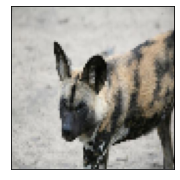

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(6,3))
plt.xticks([])
plt.yticks([])
plt.imshow(test_images[3030])


In [ ]:
test_images.shape
print(test_labels)

{'n01930112': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 

In [ ]:
num_class = 100
images_per_class = 600


In [ ]:

def get_next_batch(dataset, no_of_classes, num_way, num_shot, num_query):
  episodic_classes = np.random.permutation(no_of_classes)[:num_way]
  support = np.zeros([num_way, num_shot, 84, 84, 3], dtype=np.float32)
  query = np.zeros([num_way, num_query, 84, 84, 3], dtype=np.float32)

  for index, class_ in enumerate(episodic_classes):
    start_index = find_start_index(class_)
    #check that the size is greater than num_shot + num_query
    indices = np.arange(start_index, start_index + images_per_class)
    selected = np.random.permutation(indices)[:num_shot + num_query]
    for support_index in range(num_shot):
       support[index][support_index] = dataset[selected[support_index]] 
    for query_index in range(num_query):
       query[index][query_index] = dataset[selected[num_shot + query_index]]  
    #support[index] = dataset[int(selected[:num_shot])]
    #query[index] = dataset[int(selected[num_shot:])]
    
  return support, query

def find_start_index(class_):
  return 600 * class_



In [ ]:
support, query = get_next_batch(test_images, test_classes, 20, 7, 3)

In [ ]:
support.shape

(20, 7, 84, 84, 3)

In [ ]:
query.shape

(20, 3, 84, 84, 3)

In [ ]:
def show_image(dataset, index, image_number):
  plt.figure(figsize=(2,3))
  plt.xticks([])
  plt.yticks([])
  plt.imshow(dataset[index][image_number])


In [ ]:
support[6]

array([[[[0.00392157, 0.00392157, 0.00392157],
         [0.00392157, 0.00392157, 0.00392157],
         [0.00392157, 0.00392157, 0.00392157],
         ...,
         [0.00392157, 0.00392157, 0.00392157],
         [0.00784314, 0.00784314, 0.00784314],
         [0.00784314, 0.00784314, 0.00784314]],

        [[0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         ...,
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ]],

        [[0.00392157, 0.00392157, 0.00392157],
         [0.00392157, 0.00392157, 0.00392157],
         [0.00392157, 0.00392157, 0.00392157],
         ...,
         [0.00392157, 0.00392157, 0.00392157],
         [0.00392157, 0.00392157, 0.00392157],
         [0.00392157, 0.00392157, 0.00392157]],

        ...,

        [[0.79607844, 0.74509805, 0.70980394],
         [0.85490197, 0.7882353 , 0.73333335]

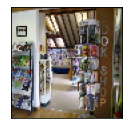

In [ ]:
show_image(support, 2, 5)

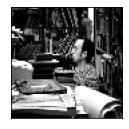

In [ ]:
show_image(query, 2, 2)

In [ ]:
from tensorflow.keras.layers import Dense, Flatten, Conv2D
from tensorflow.keras import Model

In [ ]:
class Prototypical(Model):
    """
    Implemenation of Prototypical Network.
    """
    def __init__(self, n_support, n_query, w, h, c):
        """
        Args:
            n_support (int): number of support examples.
            n_query (int): number of query examples.
            w (int): image width .
            h (int): image height.
            c (int): number of channels.
        """
        super(Prototypical, self).__init__()
        self.w, self.h, self.c = w, h, c

        # Encoder as ResNet like CNN with 4 blocks
        self.encoder = tf.keras.Sequential([
            tf.keras.layers.Conv2D(filters=64, kernel_size=3, padding='same'),
            tf.keras.layers.BatchNormalization(),
            tf.keras.layers.ReLU(),
            tf.keras.layers.MaxPool2D((2, 2)),

            tf.keras.layers.Conv2D(filters=64, kernel_size=3, padding='same'),
            tf.keras.layers.BatchNormalization(),
            tf.keras.layers.ReLU(),
            tf.keras.layers.MaxPool2D((2, 2)),

            tf.keras.layers.Conv2D(filters=64, kernel_size=3, padding='same'),
            tf.keras.layers.BatchNormalization(),
            tf.keras.layers.ReLU(),
            tf.keras.layers.MaxPool2D((2, 2)),

            tf.keras.layers.Conv2D(filters=64, kernel_size=3, padding='same'),
            tf.keras.layers.BatchNormalization(),
            tf.keras.layers.ReLU(),
            tf.keras.layers.MaxPool2D((2, 2)), Flatten()]
        )

    def call(self, support, query):
        n_class = support.shape[0]
        n_support = support.shape[1]
        n_query = query.shape[1]
        y = np.tile(np.arange(n_class)[:, np.newaxis], (1, n_query))
        y_onehot = tf.cast(tf.one_hot(y, n_class), tf.float32)

        # correct indices of support samples (just natural order)
        target_inds = tf.reshape(tf.range(n_class), [n_class, 1])
        target_inds = tf.tile(target_inds, [1, n_query])

        # merge support and query to forward through encoder
        cat = tf.concat([
            tf.reshape(support, [n_class * n_support,
                                 self.w, self.h, self.c]),
            tf.reshape(query, [n_class * n_query,
                               self.w, self.h, self.c])], axis=0)
        z = self.encoder(cat)

        # Divide embedding into support and query
        z_prototypes = tf.reshape(z[:n_class * n_support],
                                  [n_class, n_support, z.shape[-1]])
        # Prototypes are means of n_support examples
        z_prototypes = tf.math.reduce_mean(z_prototypes, axis=1)
        z_query = z[n_class * n_support:]

        # Calculate distances between query and prototypes
        dists = euclidean_distance(z_query, z_prototypes)

        # log softmax of calculated distances
        log_p_y = tf.nn.log_softmax(-dists, axis=-1)
        log_p_y = tf.reshape(log_p_y, [n_class, n_query, -1])
        
        loss = -tf.reduce_mean(tf.reshape(tf.reduce_sum(tf.multiply(y_onehot, log_p_y), axis=-1), [-1]))
        eq = tf.cast(tf.equal(
            tf.cast(tf.argmax(log_p_y, axis=-1), tf.int32), 
            tf.cast(y, tf.int32)), tf.float32)
        acc = tf.reduce_mean(eq)
        return loss, acc

    def save(self, model_path):
        """
        Save encoder to the file.

        Args:
            model_path (str): path to the .h5 file.

        Returns: None

        """
        self.encoder.save(model_path)

    def load(self, model_path):
        """
        Load encoder from the file.

        Args:
            model_path (str): path to the .h5 file.

        Returns: None

        """
        self.encoder(tf.zeros([1, self.w, self.h, self.c]))
        self.encoder.load_weights(model_path)

In [ ]:
def euclidean_distance(a, b):

    N, D = tf.shape(a)[0], tf.shape(a)[1]
    M = tf.shape(b)[0]
    a = tf.tile(tf.expand_dims(a, axis=1), (1, M, 1))
    b = tf.tile(tf.expand_dims(b, axis=0), (N, 1, 1))
    return tf.reduce_mean(tf.square(a - b), axis=2)

In [ ]:
num_ways = [5, 5, 12, 12, 15]
num_shots = [5, 1, 5, 1, 3]
learning_rate = 0.001

In [ ]:
#number of classes
num_way = num_ways[0] 

#number of examples per class for support set
num_shot = num_shots[0]  

#number of query points
num_query = num_shots[0] 

train_loss = tf.metrics.Mean(name='train_loss')
train_acc = tf.metrics.Mean(name='train_accuracy')
#support = np.zeros([num_way, num_shot, img_height, img_width, 1], dtype=np.float32)
#query = np.zeros([num_way, num_query, img_height, img_width, 1], dtype=np.float32)
model = Prototypical(support, query, 84, 84, 3)
optimizer = tf.keras.optimizers.Adam(0.001)

num_epochs = 80
num_episodes = 100
save_path = "./results/models/mini_train0.h5"

@tf.function
def loss(support, query):
  loss, acc = model(support, query)
  return loss, acc

@tf.function
def train_step(support, query):
  with tf.GradientTape() as tape:
    loss, acc = model(support, query)
  gradients = tape.gradient(loss, model.trainable_variables)
  optimizer.apply_gradients(
        zip(gradients, model.trainable_variables))
  train_loss(loss)
  train_acc(acc)

@tf.function
def val_step(loss_func, support, query):
  loss, acc = loss_func(support, query)
  val_loss(loss)
  val_acc(acc)

least_loss = {'least_loss': 100.00}

for epoch in range(num_epochs):
  train_loss.reset_states()
  train_acc.reset_states()

  for episode in range(num_episodes):
    train_support, train_query = get_next_batch(train_images, train_classes, num_way, num_shot, num_query)
    train_step(train_support, train_query)

  cur_loss = train_loss.result().numpy()
  if cur_loss < least_loss['least_loss']:
      print("Saving new best model with loss: ", cur_loss)
      least_loss['least_loss'] = cur_loss
      model.save(save_path)
  template = 'Epoch {}, Loss: {}, Accuracy: {}'
  print(template.format(epoch + 1, train_loss.result(), train_acc.result() * 100))

Saving new best model with loss:  1.5771708
Epoch 1, Loss: 1.5771708488464355, Accuracy: 28.799999237060547


Saving new best model with loss:  1.5636749
Epoch 2, Loss: 1.5636749267578125, Accuracy: 31.199996948242188


Saving new best model with loss:  1.4854975
Epoch 3, Loss: 1.4854974746704102, Accuracy: 36.83999252319336
Epoch 4, Loss: 1.5001885890960693, Accuracy: 36.15999984741211


Saving new best model with loss:  1.4659817
Epoch 5, Loss: 1.4659817218780518, Accuracy: 37.60000228881836


Saving new best model with loss:  1.4381263
Epoch 6, Loss: 1.4381263256072998, Accuracy: 40.07999801635742
Epoch 7, Loss: 1.4490398168563843, Accuracy: 38.91999816894531


Saving new best model with loss:  1.4235585
Epoch 8, Loss: 1.4235584735870361, Accuracy: 40.44000244140625


Saving new best model with loss:  1.4004158
Epoch 9, Loss: 1.4004157781600952, Accuracy: 41.79999542236328


Saving new best model with loss:  1.3871949
Epoch 10, Loss: 1.3871948719024658, Accuracy: 42.91999816894531


Saving new best model with loss:  1.3576088
Epoch 11, Loss: 1.3576087951660156, Accuracy: 45.36000061035156


Saving new best model with loss:  1.3452249
Epoch 12, Loss: 1.3452248573303223, Accuracy: 45.7599983215332


Saving new best model with loss:  1.3250024
Epoch 13, Loss: 1.3250024318695068, Accuracy: 46.639991760253906


Saving new best model with loss:  1.2981066
Epoch 14, Loss: 1.2981065511703491, Accuracy: 48.79998016357422
Epoch 15, Loss: 1.3200979232788086, Accuracy: 46.6400032043457
Epoch 16, Loss: 1.3237720727920532, Accuracy: 46.999996185302734


Saving new best model with loss:  1.2646383
Epoch 17, Loss: 1.2646383047103882, Accuracy: 48.76000213623047


Saving new best model with loss:  1.2595892
Epoch 18, Loss: 1.2595891952514648, Accuracy: 50.12000274658203
Epoch 19, Loss: 1.319313645362854, Accuracy: 45.95999526977539


Saving new best model with loss:  1.2411634
Epoch 20, Loss: 1.2411633729934692, Accuracy: 50.19999313354492
Epoch 21, Loss: 1.2952040433883667, Accuracy: 48.03998947143555


Saving new best model with loss:  1.2379062
Epoch 22, Loss: 1.2379062175750732, Accuracy: 49.56000900268555


Saving new best model with loss:  1.2082813
Epoch 23, Loss: 1.2082812786102295, Accuracy: 51.12000274658203
Epoch 24, Loss: 1.2138543128967285, Accuracy: 51.160003662109375
Epoch 25, Loss: 1.2356982231140137, Accuracy: 51.1199951171875


Saving new best model with loss:  1.1956093
Epoch 26, Loss: 1.1956093311309814, Accuracy: 52.03999710083008


Saving new best model with loss:  1.1538676
Epoch 27, Loss: 1.1538676023483276, Accuracy: 53.320003509521484
Epoch 28, Loss: 1.2641675472259521, Accuracy: 49.99999237060547
Epoch 29, Loss: 1.2285981178283691, Accuracy: 49.400001525878906
Epoch 30, Loss: 1.2135998010635376, Accuracy: 52.55999755859375
Epoch 31, Loss: 1.1720815896987915, Accuracy: 54.80000305175781


Saving new best model with loss:  1.1485614
Epoch 32, Loss: 1.1485613584518433, Accuracy: 54.52000427246094
Epoch 33, Loss: 1.1722967624664307, Accuracy: 52.72000503540039
Epoch 34, Loss: 1.173271894454956, Accuracy: 53.52000427246094


Saving new best model with loss:  1.1379848
Epoch 35, Loss: 1.1379847526550293, Accuracy: 55.239986419677734


Saving new best model with loss:  1.1329862
Epoch 36, Loss: 1.1329861879348755, Accuracy: 54.28000259399414
Epoch 37, Loss: 1.1690731048583984, Accuracy: 54.07999801635742
Epoch 38, Loss: 1.1368672847747803, Accuracy: 54.8799934387207


Saving new best model with loss:  1.1312058
Epoch 39, Loss: 1.1312057971954346, Accuracy: 55.19999313354492
Epoch 40, Loss: 1.1373900175094604, Accuracy: 55.31999588012695


Saving new best model with loss:  1.1046267
Epoch 41, Loss: 1.1046266555786133, Accuracy: 56.56000518798828
Epoch 42, Loss: 1.1577792167663574, Accuracy: 54.400001525878906


Saving new best model with loss:  1.0791082
Epoch 43, Loss: 1.0791082382202148, Accuracy: 59.40000534057617


Saving new best model with loss:  1.076345
Epoch 44, Loss: 1.0763449668884277, Accuracy: 58.320003509521484


Saving new best model with loss:  1.0754584
Epoch 45, Loss: 1.0754584074020386, Accuracy: 57.159976959228516
Epoch 46, Loss: 1.0986441373825073, Accuracy: 56.51999282836914


Saving new best model with loss:  1.0666945
Epoch 47, Loss: 1.0666944980621338, Accuracy: 58.47999954223633
Epoch 48, Loss: 1.1268045902252197, Accuracy: 55.44000244140625
Epoch 49, Loss: 1.1122058629989624, Accuracy: 55.51999282836914
Epoch 50, Loss: 1.0717281103134155, Accuracy: 58.28000259399414
Epoch 51, Loss: 1.070327877998352, Accuracy: 58.43999481201172


Saving new best model with loss:  1.052591
Epoch 52, Loss: 1.0525909662246704, Accuracy: 59.559993743896484


Saving new best model with loss:  1.0412321
Epoch 53, Loss: 1.0412321090698242, Accuracy: 60.03998947143555
Epoch 54, Loss: 1.0517725944519043, Accuracy: 59.35999298095703
Epoch 55, Loss: 1.0847290754318237, Accuracy: 57.23999786376953
Epoch 56, Loss: 1.0630625486373901, Accuracy: 58.11998748779297
Epoch 57, Loss: 1.0675091743469238, Accuracy: 58.03999328613281


Saving new best model with loss:  1.0406578
Epoch 58, Loss: 1.0406577587127686, Accuracy: 59.75999069213867


Saving new best model with loss:  1.0377814
Epoch 59, Loss: 1.0377813577651978, Accuracy: 59.399993896484375


Saving new best model with loss:  0.9899038
Epoch 60, Loss: 0.9899038076400757, Accuracy: 62.480003356933594
Epoch 61, Loss: 0.9996141791343689, Accuracy: 61.03998947143555
Epoch 62, Loss: 1.0112392902374268, Accuracy: 60.560001373291016
Epoch 63, Loss: 1.0320103168487549, Accuracy: 58.399986267089844


Saving new best model with loss:  0.9742333
Epoch 64, Loss: 0.9742333292961121, Accuracy: 63.63999938964844
Epoch 65, Loss: 0.9921983480453491, Accuracy: 61.08000183105469
Epoch 66, Loss: 0.9894623756408691, Accuracy: 60.879974365234375
Epoch 67, Loss: 1.016129493713379, Accuracy: 60.759986877441406
Epoch 68, Loss: 0.9750820398330688, Accuracy: 63.040000915527344
Epoch 69, Loss: 1.001162052154541, Accuracy: 62.59999084472656
Epoch 70, Loss: 0.982649028301239, Accuracy: 62.03999328613281
Epoch 71, Loss: 1.0062810182571411, Accuracy: 61.19999694824219


Saving new best model with loss:  0.9603002
Epoch 72, Loss: 0.9603002071380615, Accuracy: 63.959991455078125
Epoch 73, Loss: 0.980573296546936, Accuracy: 62.63998794555664
Epoch 74, Loss: 0.9694926738739014, Accuracy: 61.95998764038086
Epoch 75, Loss: 0.9975970387458801, Accuracy: 61.63999557495117
Epoch 76, Loss: 0.9788296222686768, Accuracy: 61.56000518798828


Saving new best model with loss:  0.93897897
Epoch 77, Loss: 0.9389789700508118, Accuracy: 64.75999450683594
Epoch 78, Loss: 0.9867912530899048, Accuracy: 61.599998474121094
Epoch 79, Loss: 0.9933105707168579, Accuracy: 61.36000061035156
Epoch 80, Loss: 0.9600851535797119, Accuracy: 62.44000244140625


In [ ]:
#number of classes
num_way = num_ways[1] 

#number of examples per class for support set
num_shot = num_shots[1]  

#number of query points
num_query = num_shots[1] 

train_loss = tf.metrics.Mean(name='train_loss')
train_acc = tf.metrics.Mean(name='train_accuracy')
#support = np.zeros([num_way, num_shot, img_height, img_width, 1], dtype=np.float32)
#query = np.zeros([num_way, num_query, img_height, img_width, 1], dtype=np.float32)
model = Prototypical(support, query, 84, 84, 3)
optimizer = tf.keras.optimizers.Adam(0.001)

num_epochs = 80
num_episodes = 100
save_path = "./results/models/mini_train1.h5"

@tf.function
def loss(support, query):
  loss, acc = model(support, query)
  return loss, acc

@tf.function
def train_step(support, query):
  with tf.GradientTape() as tape:
    loss, acc = model(support, query)
  gradients = tape.gradient(loss, model.trainable_variables)
  optimizer.apply_gradients(
        zip(gradients, model.trainable_variables))
  train_loss(loss)
  train_acc(acc)

@tf.function
def val_step(loss_func, support, query):
  loss, acc = loss_func(support, query)
  val_loss(loss)
  val_acc(acc)

least_loss = {'least_loss': 100.00}

for epoch in range(num_epochs):
  train_loss.reset_states()
  train_acc.reset_states()

  for episode in range(num_episodes):
    train_support, train_query = get_next_batch(train_images, train_classes, num_way, num_shot, num_query)
    train_step(train_support, train_query)

  cur_loss = train_loss.result().numpy()
  if cur_loss < least_loss['least_loss']:
      print("Saving new best model with loss: ", cur_loss)
      least_loss['least_loss'] = cur_loss
      model.save(save_path)
  template = 'Epoch {}, Loss: {}, Accuracy: {}'
  print(template.format(epoch + 1, train_loss.result(), train_acc.result() * 100))

Saving new best model with loss:  1.6099565
Epoch 1, Loss: 1.6099565029144287, Accuracy: 23.40000343322754


Saving new best model with loss:  1.5884094
Epoch 2, Loss: 1.588409423828125, Accuracy: 28.0
Epoch 3, Loss: 1.5884819030761719, Accuracy: 30.400007247924805
Epoch 4, Loss: 1.6068271398544312, Accuracy: 28.40000343322754
Epoch 5, Loss: 1.6003265380859375, Accuracy: 26.20000457763672


Saving new best model with loss:  1.5852878
Epoch 6, Loss: 1.5852878093719482, Accuracy: 31.000003814697266
Epoch 7, Loss: 1.5877221822738647, Accuracy: 25.199996948242188


Saving new best model with loss:  1.5786854
Epoch 8, Loss: 1.5786854028701782, Accuracy: 26.600000381469727


Saving new best model with loss:  1.561621
Epoch 9, Loss: 1.5616209506988525, Accuracy: 28.800006866455078
Epoch 10, Loss: 1.5841656923294067, Accuracy: 23.399999618530273
Epoch 11, Loss: 1.57252836227417, Accuracy: 26.20000457763672
Epoch 12, Loss: 1.5900224447250366, Accuracy: 25.199996948242188
Epoch 13, Loss: 1.580019474029541, Accuracy: 28.400009155273438
Epoch 14, Loss: 1.578354835510254, Accuracy: 27.799999237060547
Epoch 15, Loss: 1.5850651264190674, Accuracy: 27.600006103515625
Epoch 16, Loss: 1.598517656326294, Accuracy: 26.20000457763672
Epoch 17, Loss: 1.5856521129608154, Accuracy: 26.40001106262207
Epoch 18, Loss: 1.5853463411331177, Accuracy: 27.800010681152344
Epoch 19, Loss: 1.5725406408309937, Accuracy: 28.800010681152344
Epoch 20, Loss: 1.572293996810913, Accuracy: 26.199996948242188
Epoch 21, Loss: 1.5837242603302002, Accuracy: 28.200010299682617
Epoch 22, Loss: 1.5830588340759277, Accuracy: 25.40000343322754
Epoch 23, Loss: 1.5708657503128052, Accuracy: 27.800003051

Saving new best model with loss:  1.5413572
Epoch 26, Loss: 1.541357159614563, Accuracy: 30.400012969970703
Epoch 27, Loss: 1.5715500116348267, Accuracy: 29.600006103515625
Epoch 28, Loss: 1.5847645998001099, Accuracy: 29.800003051757812
Epoch 29, Loss: 1.5608972311019897, Accuracy: 28.40000343322754
Epoch 30, Loss: 1.5638450384140015, Accuracy: 28.60000228881836
Epoch 31, Loss: 1.5655815601348877, Accuracy: 30.19999885559082
Epoch 32, Loss: 1.5759505033493042, Accuracy: 28.000009536743164
Epoch 33, Loss: 1.5447250604629517, Accuracy: 29.0000057220459
Epoch 34, Loss: 1.5692585706710815, Accuracy: 28.80000114440918
Epoch 35, Loss: 1.5772758722305298, Accuracy: 30.600006103515625
Epoch 36, Loss: 1.5737237930297852, Accuracy: 29.0
Epoch 37, Loss: 1.5733580589294434, Accuracy: 28.20000648498535
Epoch 38, Loss: 1.570916771888733, Accuracy: 25.600008010864258
Epoch 39, Loss: 1.569237470626831, Accuracy: 29.600004196166992
Epoch 40, Loss: 1.5595173835754395, Accuracy: 28.800004959106445
Epoch

Saving new best model with loss:  1.5372739
Epoch 47, Loss: 1.53727388381958, Accuracy: 28.800006866455078
Epoch 48, Loss: 1.5611217021942139, Accuracy: 29.800010681152344
Epoch 49, Loss: 1.5398160219192505, Accuracy: 31.800006866455078
Epoch 50, Loss: 1.5633262395858765, Accuracy: 28.600008010864258
Epoch 51, Loss: 1.5669976472854614, Accuracy: 29.000001907348633
Epoch 52, Loss: 1.545276165008545, Accuracy: 29.0000057220459
Epoch 53, Loss: 1.603706955909729, Accuracy: 25.599994659423828
Epoch 54, Loss: 1.5763063430786133, Accuracy: 28.800004959106445
Epoch 55, Loss: 1.5726959705352783, Accuracy: 27.9999942779541
Epoch 56, Loss: 1.5499544143676758, Accuracy: 30.000001907348633
Epoch 57, Loss: 1.5659979581832886, Accuracy: 30.800003051757812
Epoch 58, Loss: 1.557924747467041, Accuracy: 31.0000057220459
Epoch 59, Loss: 1.5626367330551147, Accuracy: 28.800006866455078
Epoch 60, Loss: 1.5686346292495728, Accuracy: 26.600006103515625
Epoch 61, Loss: 1.5784516334533691, Accuracy: 28.20001029

Saving new best model with loss:  1.5264273
Epoch 71, Loss: 1.5264272689819336, Accuracy: 32.800010681152344
Epoch 72, Loss: 1.5631486177444458, Accuracy: 27.000009536743164
Epoch 73, Loss: 1.5475810766220093, Accuracy: 30.20000457763672
Epoch 74, Loss: 1.5613690614700317, Accuracy: 28.599994659423828
Epoch 75, Loss: 1.5507497787475586, Accuracy: 31.799999237060547
Epoch 76, Loss: 1.5647201538085938, Accuracy: 23.400001525878906
Epoch 77, Loss: 1.5469223260879517, Accuracy: 29.0000057220459
Epoch 78, Loss: 1.535292625427246, Accuracy: 33.600006103515625
Epoch 79, Loss: 1.5534740686416626, Accuracy: 31.400009155273438
Epoch 80, Loss: 1.538681983947754, Accuracy: 29.600004196166992


In [ ]:
#number of classes
num_way = num_ways[2] 

#number of examples per class for support set
num_shot = num_shots[2]  

#number of query points
num_query = num_shots[2] 

train_loss = tf.metrics.Mean(name='train_loss')
train_acc = tf.metrics.Mean(name='train_accuracy')
#support = np.zeros([num_way, num_shot, img_height, img_width, 1], dtype=np.float32)
#query = np.zeros([num_way, num_query, img_height, img_width, 1], dtype=np.float32)
model = Prototypical(support, query, 84, 84, 3)
optimizer = tf.keras.optimizers.Adam(0.001)

num_epochs = 80
num_episodes = 100
save_path = "./results/models/mini_train2.h5"

@tf.function
def loss(support, query):
  loss, acc = model(support, query)
  return loss, acc

@tf.function
def train_step(support, query):
  with tf.GradientTape() as tape:
    loss, acc = model(support, query)
  gradients = tape.gradient(loss, model.trainable_variables)
  optimizer.apply_gradients(
        zip(gradients, model.trainable_variables))
  train_loss(loss)
  train_acc(acc)

@tf.function
def val_step(loss_func, support, query):
  loss, acc = loss_func(support, query)
  val_loss(loss)
  val_acc(acc)

least_loss = {'least_loss': 100.00}

for epoch in range(num_epochs):
  train_loss.reset_states()
  train_acc.reset_states()

  for episode in range(num_episodes):
    train_support, train_query = get_next_batch(train_images, train_classes, num_way, num_shot, num_query)
    train_step(train_support, train_query)

  cur_loss = train_loss.result().numpy()
  if cur_loss < least_loss['least_loss']:
      print("Saving new best model with loss: ", cur_loss)
      least_loss['least_loss'] = cur_loss
      model.save(save_path)
  template = 'Epoch {}, Loss: {}, Accuracy: {}'
  print(template.format(epoch + 1, train_loss.result(), train_acc.result() * 100))

Saving new best model with loss:  2.3519633
Epoch 1, Loss: 2.3519632816314697, Accuracy: 19.449995040893555


Saving new best model with loss:  2.2870207
Epoch 2, Loss: 2.287020683288574, Accuracy: 22.69999885559082


Saving new best model with loss:  2.2113802
Epoch 3, Loss: 2.2113802433013916, Accuracy: 25.73333740234375


Saving new best model with loss:  2.164315
Epoch 4, Loss: 2.1643149852752686, Accuracy: 26.116666793823242


Saving new best model with loss:  2.1611738
Epoch 5, Loss: 2.1611738204956055, Accuracy: 28.083335876464844


Saving new best model with loss:  2.1429703
Epoch 6, Loss: 2.142970323562622, Accuracy: 28.4666690826416


Saving new best model with loss:  2.1133432
Epoch 7, Loss: 2.1133432388305664, Accuracy: 29.86667251586914


Saving new best model with loss:  2.0458179
Epoch 8, Loss: 2.0458178520202637, Accuracy: 31.55000877380371
Epoch 9, Loss: 2.058263063430786, Accuracy: 31.13333511352539


Saving new best model with loss:  2.0051713
Epoch 10, Loss: 2.005171298980713, Accuracy: 33.05000686645508


Saving new best model with loss:  1.9619235
Epoch 11, Loss: 1.9619234800338745, Accuracy: 35.38332748413086
Epoch 12, Loss: 1.998097538948059, Accuracy: 33.40000534057617


Saving new best model with loss:  1.919438
Epoch 13, Loss: 1.9194380044937134, Accuracy: 36.31666564941406
Epoch 14, Loss: 1.9378869533538818, Accuracy: 35.31666564941406


Saving new best model with loss:  1.8961043
Epoch 15, Loss: 1.896104335784912, Accuracy: 36.39999771118164


Saving new best model with loss:  1.8758448
Epoch 16, Loss: 1.8758448362350464, Accuracy: 38.09999084472656


Saving new best model with loss:  1.8714359
Epoch 17, Loss: 1.8714358806610107, Accuracy: 37.93333053588867


Saving new best model with loss:  1.8337843
Epoch 18, Loss: 1.8337843418121338, Accuracy: 39.383331298828125


Saving new best model with loss:  1.8106047
Epoch 19, Loss: 1.8106046915054321, Accuracy: 40.13333511352539
Epoch 20, Loss: 1.846575140953064, Accuracy: 37.78333282470703


Saving new best model with loss:  1.7761438
Epoch 21, Loss: 1.7761437892913818, Accuracy: 41.249996185302734
Epoch 22, Loss: 1.7828123569488525, Accuracy: 40.7833366394043


Saving new best model with loss:  1.7539194
Epoch 23, Loss: 1.7539193630218506, Accuracy: 41.7166633605957


Saving new best model with loss:  1.723501
Epoch 24, Loss: 1.7235009670257568, Accuracy: 42.91667938232422
Epoch 25, Loss: 1.7463494539260864, Accuracy: 42.150001525878906
Epoch 26, Loss: 1.763850450515747, Accuracy: 41.266666412353516


Saving new best model with loss:  1.7093161
Epoch 27, Loss: 1.7093161344528198, Accuracy: 43.200008392333984
Epoch 28, Loss: 1.7262781858444214, Accuracy: 42.849998474121094


Saving new best model with loss:  1.6953669
Epoch 29, Loss: 1.6953668594360352, Accuracy: 43.750003814697266


Saving new best model with loss:  1.6898004
Epoch 30, Loss: 1.6898003816604614, Accuracy: 42.650001525878906


Saving new best model with loss:  1.6327777
Epoch 31, Loss: 1.6327776908874512, Accuracy: 45.50001525878906
Epoch 32, Loss: 1.653596043586731, Accuracy: 44.9000129699707
Epoch 33, Loss: 1.6584365367889404, Accuracy: 44.76667785644531
Epoch 34, Loss: 1.6433181762695312, Accuracy: 45.54999923706055


Saving new best model with loss:  1.6030083
Epoch 35, Loss: 1.6030082702636719, Accuracy: 46.499996185302734
Epoch 36, Loss: 1.6235772371292114, Accuracy: 46.4666748046875


Saving new best model with loss:  1.5976502
Epoch 37, Loss: 1.597650170326233, Accuracy: 47.31666564941406


Saving new best model with loss:  1.5901524
Epoch 38, Loss: 1.590152382850647, Accuracy: 47.94999694824219
Epoch 39, Loss: 1.6003036499023438, Accuracy: 46.64999771118164


Saving new best model with loss:  1.5835496
Epoch 40, Loss: 1.5835496187210083, Accuracy: 47.4666633605957


Saving new best model with loss:  1.5544522
Epoch 41, Loss: 1.5544521808624268, Accuracy: 48.16666793823242
Epoch 42, Loss: 1.573898196220398, Accuracy: 48.15000534057617
Epoch 43, Loss: 1.5565528869628906, Accuracy: 47.98332977294922


Saving new best model with loss:  1.5339721
Epoch 44, Loss: 1.533972144126892, Accuracy: 47.91667175292969


Saving new best model with loss:  1.5275041
Epoch 45, Loss: 1.5275040864944458, Accuracy: 49.166683197021484
Epoch 46, Loss: 1.5706121921539307, Accuracy: 47.666664123535156


Saving new best model with loss:  1.5264215
Epoch 47, Loss: 1.5264215469360352, Accuracy: 49.14999771118164


Saving new best model with loss:  1.5019587
Epoch 48, Loss: 1.5019587278366089, Accuracy: 49.649993896484375
Epoch 49, Loss: 1.5297214984893799, Accuracy: 49.116668701171875
Epoch 50, Loss: 1.5034725666046143, Accuracy: 49.31665802001953


Saving new best model with loss:  1.4851924
Epoch 51, Loss: 1.4851924180984497, Accuracy: 50.23332214355469


Saving new best model with loss:  1.475645
Epoch 52, Loss: 1.4756449460983276, Accuracy: 50.549991607666016
Epoch 53, Loss: 1.5357162952423096, Accuracy: 48.58333206176758
Epoch 54, Loss: 1.4888436794281006, Accuracy: 50.63332748413086


Saving new best model with loss:  1.4476384
Epoch 55, Loss: 1.4476383924484253, Accuracy: 51.28334045410156
Epoch 56, Loss: 1.5119552612304688, Accuracy: 50.04999542236328
Epoch 57, Loss: 1.482384443283081, Accuracy: 49.91666793823242
Epoch 58, Loss: 1.4540109634399414, Accuracy: 50.69999694824219
Epoch 59, Loss: 1.4559848308563232, Accuracy: 51.1500129699707
Epoch 60, Loss: 1.4697444438934326, Accuracy: 50.91667938232422
Epoch 61, Loss: 1.4725983142852783, Accuracy: 50.16666793823242
Epoch 62, Loss: 1.4587863683700562, Accuracy: 50.98332214355469


Saving new best model with loss:  1.3973722
Epoch 63, Loss: 1.3973722457885742, Accuracy: 53.38331604003906
Epoch 64, Loss: 1.410165548324585, Accuracy: 52.76667022705078
Epoch 65, Loss: 1.4480682611465454, Accuracy: 51.09999084472656
Epoch 66, Loss: 1.4547641277313232, Accuracy: 51.616668701171875
Epoch 67, Loss: 1.408117651939392, Accuracy: 52.44999694824219
Epoch 68, Loss: 1.4310756921768188, Accuracy: 51.4666633605957
Epoch 69, Loss: 1.4211785793304443, Accuracy: 52.749996185302734
Epoch 70, Loss: 1.442029595375061, Accuracy: 51.7833251953125


Saving new best model with loss:  1.3578782
Epoch 71, Loss: 1.3578782081604004, Accuracy: 54.633323669433594
Epoch 72, Loss: 1.3842166662216187, Accuracy: 53.76665115356445
Epoch 73, Loss: 1.3952505588531494, Accuracy: 53.93331527709961
Epoch 74, Loss: 1.3829712867736816, Accuracy: 53.51665496826172
Epoch 75, Loss: 1.3837406635284424, Accuracy: 53.04999542236328
Epoch 76, Loss: 1.3589454889297485, Accuracy: 54.05000305175781


Saving new best model with loss:  1.332703
Epoch 77, Loss: 1.3327029943466187, Accuracy: 55.166648864746094
Epoch 78, Loss: 1.3552377223968506, Accuracy: 54.91666793823242
Epoch 79, Loss: 1.3884484767913818, Accuracy: 52.89999771118164


Saving new best model with loss:  1.33254
Epoch 80, Loss: 1.3325400352478027, Accuracy: 54.96665954589844


In [ ]:
#number of classes
num_way = num_ways[3] 

#number of examples per class for support set
num_shot = num_shots[3]  

#number of query points
num_query = num_shots[3] 

train_loss = tf.metrics.Mean(name='train_loss')
train_acc = tf.metrics.Mean(name='train_accuracy')
#support = np.zeros([num_way, num_shot, img_height, img_width, 1], dtype=np.float32)
#query = np.zeros([num_way, num_query, img_height, img_width, 1], dtype=np.float32)
model = Prototypical(support, query, 84, 84, 3)
optimizer = tf.keras.optimizers.Adam(0.001)

num_epochs = 80
num_episodes = 100
save_path = "./results/models/mini_train3.h5"

@tf.function
def loss(support, query):
  loss, acc = model(support, query)
  return loss, acc

@tf.function
def train_step(support, query):
  with tf.GradientTape() as tape:
    loss, acc = model(support, query)
  gradients = tape.gradient(loss, model.trainable_variables)
  optimizer.apply_gradients(
        zip(gradients, model.trainable_variables))
  train_loss(loss)
  train_acc(acc)

@tf.function
def val_step(loss_func, support, query):
  loss, acc = loss_func(support, query)
  val_loss(loss)
  val_acc(acc)

least_loss = {'least_loss': 100.00}

for epoch in range(num_epochs):
  train_loss.reset_states()
  train_acc.reset_states()

  for episode in range(num_episodes):
    train_support, train_query = get_next_batch(train_images, train_classes, num_way, num_shot, num_query)
    train_step(train_support, train_query)

  cur_loss = train_loss.result().numpy()
  if cur_loss < least_loss['least_loss']:
      print("Saving new best model with loss: ", cur_loss)
      least_loss['least_loss'] = cur_loss
      model.save(save_path)
  template = 'Epoch {}, Loss: {}, Accuracy: {}'
  print(template.format(epoch + 1, train_loss.result(), train_acc.result() * 100))

Saving new best model with loss:  2.471017
Epoch 1, Loss: 2.4710168838500977, Accuracy: 13.833333969116211


Saving new best model with loss:  2.4640794
Epoch 2, Loss: 2.4640793800354004, Accuracy: 13.74999713897705


Saving new best model with loss:  2.4434083
Epoch 3, Loss: 2.443408250808716, Accuracy: 12.583334922790527
Epoch 4, Loss: 2.4504921436309814, Accuracy: 13.500000953674316
Epoch 5, Loss: 2.462778091430664, Accuracy: 13.74999713897705


Saving new best model with loss:  2.4411314
Epoch 6, Loss: 2.441131353378296, Accuracy: 11.666666030883789


Saving new best model with loss:  2.4348617
Epoch 7, Loss: 2.434861660003662, Accuracy: 15.666666984558105
Epoch 8, Loss: 2.4453585147857666, Accuracy: 14.5
Epoch 9, Loss: 2.4472272396087646, Accuracy: 13.249998092651367
Epoch 10, Loss: 2.4497244358062744, Accuracy: 12.416664123535156
Epoch 11, Loss: 2.439532995223999, Accuracy: 13.416664123535156
Epoch 12, Loss: 2.4548158645629883, Accuracy: 12.833331108093262


Saving new best model with loss:  2.4306877
Epoch 13, Loss: 2.430687665939331, Accuracy: 14.083333015441895


Saving new best model with loss:  2.4275587
Epoch 14, Loss: 2.427558660507202, Accuracy: 14.0


Saving new best model with loss:  2.4253385
Epoch 15, Loss: 2.4253385066986084, Accuracy: 14.833333969116211


Saving new best model with loss:  2.412698
Epoch 16, Loss: 2.4126980304718018, Accuracy: 15.833334922790527
Epoch 17, Loss: 2.4360811710357666, Accuracy: 14.25
Epoch 18, Loss: 2.4199411869049072, Accuracy: 13.166664123535156


Saving new best model with loss:  2.403077
Epoch 19, Loss: 2.4030768871307373, Accuracy: 15.666665077209473
Epoch 20, Loss: 2.4242403507232666, Accuracy: 15.166664123535156
Epoch 21, Loss: 2.4177253246307373, Accuracy: 15.583333015441895


Saving new best model with loss:  2.397952
Epoch 22, Loss: 2.397952079772949, Accuracy: 16.999998092651367
Epoch 23, Loss: 2.4132065773010254, Accuracy: 16.58333396911621


Saving new best model with loss:  2.38766
Epoch 24, Loss: 2.387660026550293, Accuracy: 16.249998092651367
Epoch 25, Loss: 2.3933603763580322, Accuracy: 16.25
Epoch 26, Loss: 2.3999342918395996, Accuracy: 17.083332061767578
Epoch 27, Loss: 2.417248249053955, Accuracy: 16.08333396911621


Saving new best model with loss:  2.3873158
Epoch 28, Loss: 2.3873157501220703, Accuracy: 17.583330154418945
Epoch 29, Loss: 2.3901636600494385, Accuracy: 18.16666603088379
Epoch 30, Loss: 2.417372941970825, Accuracy: 15.833332061767578


Saving new best model with loss:  2.3812525
Epoch 31, Loss: 2.3812525272369385, Accuracy: 16.5
Epoch 32, Loss: 2.3878607749938965, Accuracy: 17.0
Epoch 33, Loss: 2.4023852348327637, Accuracy: 16.0


Saving new best model with loss:  2.3752015
Epoch 34, Loss: 2.375201463699341, Accuracy: 18.166669845581055
Epoch 35, Loss: 2.3815648555755615, Accuracy: 18.750001907348633
Epoch 36, Loss: 2.3953745365142822, Accuracy: 16.08333396911621


Saving new best model with loss:  2.3664787
Epoch 37, Loss: 2.366478681564331, Accuracy: 17.000003814697266
Epoch 38, Loss: 2.393270969390869, Accuracy: 16.416667938232422


Saving new best model with loss:  2.3538218
Epoch 39, Loss: 2.3538217544555664, Accuracy: 19.083332061767578
Epoch 40, Loss: 2.3650693893432617, Accuracy: 17.5
Epoch 41, Loss: 2.3554885387420654, Accuracy: 18.916667938232422
Epoch 42, Loss: 2.3777859210968018, Accuracy: 16.916667938232422
Epoch 43, Loss: 2.3933558464050293, Accuracy: 17.083335876464844
Epoch 44, Loss: 2.3846006393432617, Accuracy: 18.166667938232422
Epoch 45, Loss: 2.3774220943450928, Accuracy: 18.5
Epoch 46, Loss: 2.373037338256836, Accuracy: 19.833335876464844
Epoch 47, Loss: 2.3678691387176514, Accuracy: 19.333332061767578
Epoch 48, Loss: 2.355508327484131, Accuracy: 18.83333396911621


Saving new best model with loss:  2.3465858
Epoch 49, Loss: 2.346585750579834, Accuracy: 18.333337783813477
Epoch 50, Loss: 2.3555610179901123, Accuracy: 19.249998092651367
Epoch 51, Loss: 2.371835470199585, Accuracy: 20.166669845581055


Saving new best model with loss:  2.3425338
Epoch 52, Loss: 2.342533826828003, Accuracy: 20.166664123535156


Saving new best model with loss:  2.2981353
Epoch 53, Loss: 2.298135280609131, Accuracy: 23.333332061767578
Epoch 54, Loss: 2.315148115158081, Accuracy: 19.916667938232422
Epoch 55, Loss: 2.329416275024414, Accuracy: 22.166667938232422
Epoch 56, Loss: 2.3502390384674072, Accuracy: 20.083332061767578
Epoch 57, Loss: 2.3183212280273438, Accuracy: 21.499998092651367
Epoch 58, Loss: 2.3304030895233154, Accuracy: 20.833337783813477


Saving new best model with loss:  2.297727
Epoch 59, Loss: 2.297727108001709, Accuracy: 21.66666603088379
Epoch 60, Loss: 2.344648599624634, Accuracy: 21.249998092651367
Epoch 61, Loss: 2.329925537109375, Accuracy: 20.083330154418945
Epoch 62, Loss: 2.3112387657165527, Accuracy: 19.500001907348633
Epoch 63, Loss: 2.3056039810180664, Accuracy: 20.83333396911621
Epoch 64, Loss: 2.3023033142089844, Accuracy: 21.58333396911621
Epoch 65, Loss: 2.2996692657470703, Accuracy: 20.83333396911621
Epoch 66, Loss: 2.304903268814087, Accuracy: 20.583335876464844
Epoch 67, Loss: 2.3168184757232666, Accuracy: 22.166671752929688


Saving new best model with loss:  2.2679396
Epoch 68, Loss: 2.267939567565918, Accuracy: 22.333328247070312
Epoch 69, Loss: 2.2950730323791504, Accuracy: 20.750001907348633
Epoch 70, Loss: 2.2719876766204834, Accuracy: 23.333332061767578
Epoch 71, Loss: 2.29125714302063, Accuracy: 21.416667938232422
Epoch 72, Loss: 2.285156488418579, Accuracy: 20.66666030883789


Saving new best model with loss:  2.2557573
Epoch 73, Loss: 2.2557573318481445, Accuracy: 23.749998092651367
Epoch 74, Loss: 2.2865548133850098, Accuracy: 23.333332061767578
Epoch 75, Loss: 2.2802486419677734, Accuracy: 22.833335876464844
Epoch 76, Loss: 2.2750444412231445, Accuracy: 21.749998092651367
Epoch 77, Loss: 2.2968451976776123, Accuracy: 22.083330154418945
Epoch 78, Loss: 2.289155960083008, Accuracy: 21.916669845581055
Epoch 79, Loss: 2.285613775253296, Accuracy: 22.66666603088379
Epoch 80, Loss: 2.2758073806762695, Accuracy: 22.333335876464844


In [ ]:
#number of classes
num_way = num_ways[4] 

#number of examples per class for support set
num_shot = num_shots[4]  

#number of query points
num_query = num_shots[4] 

train_loss = tf.metrics.Mean(name='train_loss')
train_acc = tf.metrics.Mean(name='train_accuracy')
#support = np.zeros([num_way, num_shot, img_height, img_width, 1], dtype=np.float32)
#query = np.zeros([num_way, num_query, img_height, img_width, 1], dtype=np.float32)
model = Prototypical(support, query, 84, 84, 3)
optimizer = tf.keras.optimizers.Adam(0.001)

num_epochs = 80
num_episodes = 100
save_path = "./results/models/mini_train4.h5"

@tf.function
def loss(support, query):
  loss, acc = model(support, query)
  return loss, acc

@tf.function
def train_step(support, query):
  with tf.GradientTape() as tape:
    loss, acc = model(support, query)
  gradients = tape.gradient(loss, model.trainable_variables)
  optimizer.apply_gradients(
        zip(gradients, model.trainable_variables))
  train_loss(loss)
  train_acc(acc)

@tf.function
def val_step(loss_func, support, query):
  loss, acc = loss_func(support, query)
  val_loss(loss)
  val_acc(acc)

least_loss = {'least_loss': 100.00}

for epoch in range(num_epochs):
  train_loss.reset_states()
  train_acc.reset_states()

  for episode in range(num_episodes):
    train_support, train_query = get_next_batch(train_images, train_classes, num_way, num_shot, num_query)
    train_step(train_support, train_query)

  cur_loss = train_loss.result().numpy()
  if cur_loss < least_loss['least_loss']:
      print("Saving new best model with loss: ", cur_loss)
      least_loss['least_loss'] = cur_loss
      model.save(save_path)
  template = 'Epoch {}, Loss: {}, Accuracy: {}'
  print(template.format(epoch + 1, train_loss.result(), train_acc.result() * 100))

Saving new best model with loss:  2.6307993
Epoch 1, Loss: 2.6307992935180664, Accuracy: 13.755558013916016


Saving new best model with loss:  2.5893285
Epoch 2, Loss: 2.5893285274505615, Accuracy: 15.644449234008789
Epoch 3, Loss: 2.5931921005249023, Accuracy: 16.31111717224121


Saving new best model with loss:  2.5476272
Epoch 4, Loss: 2.5476272106170654, Accuracy: 17.177780151367188


Saving new best model with loss:  2.5400724
Epoch 5, Loss: 2.540072441101074, Accuracy: 18.33333396911621


Saving new best model with loss:  2.5288942
Epoch 6, Loss: 2.5288941860198975, Accuracy: 18.666671752929688


Saving new best model with loss:  2.5227675
Epoch 7, Loss: 2.5227675437927246, Accuracy: 18.53333854675293


Saving new best model with loss:  2.4983377
Epoch 8, Loss: 2.498337745666504, Accuracy: 21.066673278808594


Saving new best model with loss:  2.480074
Epoch 9, Loss: 2.480073928833008, Accuracy: 20.0000057220459


Saving new best model with loss:  2.4523156
Epoch 10, Loss: 2.45231556892395, Accuracy: 21.488889694213867


Saving new best model with loss:  2.4042716
Epoch 11, Loss: 2.4042716026306152, Accuracy: 23.4666690826416
Epoch 12, Loss: 2.4138550758361816, Accuracy: 23.4666690826416


Saving new best model with loss:  2.3835938
Epoch 13, Loss: 2.383593797683716, Accuracy: 23.888891220092773


Saving new best model with loss:  2.335295
Epoch 14, Loss: 2.3352949619293213, Accuracy: 25.199996948242188
Epoch 15, Loss: 2.3464300632476807, Accuracy: 25.53333282470703


Saving new best model with loss:  2.3182404
Epoch 16, Loss: 2.3182404041290283, Accuracy: 26.199996948242188
Epoch 17, Loss: 2.322251081466675, Accuracy: 25.666669845581055


Saving new best model with loss:  2.3026485
Epoch 18, Loss: 2.3026485443115234, Accuracy: 26.266664505004883


Saving new best model with loss:  2.2998612
Epoch 19, Loss: 2.299861192703247, Accuracy: 26.444446563720703


Saving new best model with loss:  2.2629838
Epoch 20, Loss: 2.262983798980713, Accuracy: 27.444446563720703
Epoch 21, Loss: 2.278665065765381, Accuracy: 27.288896560668945


Saving new best model with loss:  2.2547455
Epoch 22, Loss: 2.2547454833984375, Accuracy: 27.866666793823242


Saving new best model with loss:  2.2107275
Epoch 23, Loss: 2.2107274532318115, Accuracy: 29.66666603088379
Epoch 24, Loss: 2.2521681785583496, Accuracy: 28.42222785949707


Saving new best model with loss:  2.186602
Epoch 25, Loss: 2.1866021156311035, Accuracy: 29.933334350585938
Epoch 26, Loss: 2.208343505859375, Accuracy: 29.355562210083008


Saving new best model with loss:  2.164723
Epoch 27, Loss: 2.1647229194641113, Accuracy: 31.044450759887695
Epoch 28, Loss: 2.1712875366210938, Accuracy: 32.35555648803711


Saving new best model with loss:  2.135374
Epoch 29, Loss: 2.135374069213867, Accuracy: 32.24444580078125


Saving new best model with loss:  2.1323426
Epoch 30, Loss: 2.132342576980591, Accuracy: 32.200008392333984


Saving new best model with loss:  2.101084
Epoch 31, Loss: 2.101083993911743, Accuracy: 33.0000114440918


Saving new best model with loss:  2.0914695
Epoch 32, Loss: 2.0914695262908936, Accuracy: 33.22222137451172
Epoch 33, Loss: 2.123298406600952, Accuracy: 32.91110610961914


Saving new best model with loss:  2.0858593
Epoch 34, Loss: 2.0858592987060547, Accuracy: 33.08888626098633


Saving new best model with loss:  2.043455
Epoch 35, Loss: 2.043454885482788, Accuracy: 34.75556564331055
Epoch 36, Loss: 2.045781373977661, Accuracy: 34.9333381652832


Saving new best model with loss:  2.032943
Epoch 37, Loss: 2.0329430103302, Accuracy: 35.244449615478516
Epoch 38, Loss: 2.064685821533203, Accuracy: 34.9333381652832
Epoch 39, Loss: 2.038729429244995, Accuracy: 34.73333740234375


Saving new best model with loss:  1.9748731
Epoch 40, Loss: 1.9748730659484863, Accuracy: 35.4888916015625
Epoch 41, Loss: 1.99737548828125, Accuracy: 35.844444274902344
Epoch 42, Loss: 2.011411428451538, Accuracy: 36.28889846801758
Epoch 43, Loss: 2.010490655899048, Accuracy: 35.64444351196289
Epoch 44, Loss: 1.9874399900436401, Accuracy: 36.444454193115234


Saving new best model with loss:  1.9298705
Epoch 45, Loss: 1.9298704862594604, Accuracy: 37.866668701171875


Saving new best model with loss:  1.9078768
Epoch 46, Loss: 1.9078768491744995, Accuracy: 37.4888916015625
Epoch 47, Loss: 1.9556875228881836, Accuracy: 36.24444580078125
Epoch 48, Loss: 1.9446699619293213, Accuracy: 37.5111198425293
Epoch 49, Loss: 1.9267990589141846, Accuracy: 38.13333511352539
Epoch 50, Loss: 1.961898684501648, Accuracy: 37.04445266723633
Epoch 51, Loss: 1.909875750541687, Accuracy: 37.91111373901367
Epoch 52, Loss: 1.9197882413864136, Accuracy: 38.08888626098633


Saving new best model with loss:  1.8836315
Epoch 53, Loss: 1.8836314678192139, Accuracy: 39.155555725097656
Epoch 54, Loss: 1.9076714515686035, Accuracy: 38.5555534362793
Epoch 55, Loss: 1.8908662796020508, Accuracy: 39.80000305175781
Epoch 56, Loss: 1.889554500579834, Accuracy: 39.000003814697266
Epoch 57, Loss: 1.920656681060791, Accuracy: 37.533329010009766


Saving new best model with loss:  1.8582275
Epoch 58, Loss: 1.8582274913787842, Accuracy: 39.06667709350586
Epoch 59, Loss: 1.8640040159225464, Accuracy: 40.844451904296875
Epoch 60, Loss: 1.8911280632019043, Accuracy: 39.22222900390625
Epoch 61, Loss: 1.8931374549865723, Accuracy: 39.26666259765625


Saving new best model with loss:  1.8331219
Epoch 62, Loss: 1.8331218957901, Accuracy: 40.66666793823242
Epoch 63, Loss: 1.8345187902450562, Accuracy: 40.977779388427734
Epoch 64, Loss: 1.8658214807510376, Accuracy: 39.48888397216797
Epoch 65, Loss: 1.8392934799194336, Accuracy: 41.577781677246094
Epoch 66, Loss: 1.8459337949752808, Accuracy: 39.79999923706055
Epoch 67, Loss: 1.853827714920044, Accuracy: 39.86665725708008


Saving new best model with loss:  1.8262767
Epoch 68, Loss: 1.8262766599655151, Accuracy: 40.93333053588867
Epoch 69, Loss: 1.837807297706604, Accuracy: 40.13334274291992


Saving new best model with loss:  1.7867923
Epoch 70, Loss: 1.786792278289795, Accuracy: 42.888885498046875
Epoch 71, Loss: 1.8348671197891235, Accuracy: 40.31110763549805
Epoch 72, Loss: 1.821824312210083, Accuracy: 40.91111373901367
Epoch 73, Loss: 1.825128197669983, Accuracy: 40.95555114746094
Epoch 74, Loss: 1.804314374923706, Accuracy: 40.95555114746094
Epoch 75, Loss: 1.8030198812484741, Accuracy: 41.44444274902344


Saving new best model with loss:  1.7624115
Epoch 76, Loss: 1.7624114751815796, Accuracy: 43.28888702392578
Epoch 77, Loss: 1.7940025329589844, Accuracy: 41.711116790771484
Epoch 78, Loss: 1.780055284500122, Accuracy: 42.4666748046875
Epoch 79, Loss: 1.8270732164382935, Accuracy: 40.88888931274414
Epoch 80, Loss: 1.7743109464645386, Accuracy: 41.33332824707031


In [ ]:
model = Prototypical(support, query, 84, 84, 3)
model_path = "./results/models/mini_train0.h5"
model.load(model_path)
print("Model loaded.")

#number of classes
num_way = num_ways[0] 

#number of examples per class for support set
num_shot = num_shots[0]  

#number of query points
num_query = num_shots[0] 

num_episodes = 1200

# Metrics to gather
test_loss = tf.metrics.Mean(name='test_loss')
test_acc = tf.metrics.Mean(name='test_accuracy')

def calc_loss(support, query):
  loss, acc = model(support, query)
  return loss, acc

for i_episode in range(num_episodes):
  test_support, test_query = get_next_batch(test_images, test_classes, num_way, num_shot, num_query)
  if (i_episode+1)%50 == 0: 
    print("Episode: ", i_episode + 1)
  loss, acc = calc_loss(test_support, test_query)
  test_loss(loss)
  test_acc(acc)

print("Loss: ", test_loss.result().numpy())
print("Accuracy: ", test_acc.result().numpy() * 100)

Model loaded.
Episode:  50
Episode:  100
Episode:  150
Episode:  200
Episode:  250
Episode:  300
Episode:  350
Episode:  400
Episode:  450
Episode:  500
Episode:  550
Episode:  600
Episode:  650
Episode:  700
Episode:  750
Episode:  800
Episode:  850
Episode:  900
Episode:  950
Episode:  1000
Episode:  1050
Episode:  1100
Episode:  1150
Episode:  1200
Loss:  1.0625949
Accuracy:  57.43662714958191


In [ ]:
model = Prototypical(support, query, 84, 84, 3)
model_path = "./results/models/mini_train1.h5"
model.load(model_path)
print("Model loaded.")

#number of classes
num_way = num_ways[1] 

#number of examples per class for support set
num_shot = num_shots[1]  

#number of query points
num_query = num_shots[1] 

num_episodes = 1200

# Metrics to gather
test_loss = tf.metrics.Mean(name='test_loss')
test_acc = tf.metrics.Mean(name='test_accuracy')

def calc_loss(support, query):
  loss, acc = model(support, query)
  return loss, acc

for i_episode in range(num_episodes):
  test_support, test_query = get_next_batch(test_images, test_classes, num_way, num_shot, num_query)
  if (i_episode+1)%50 == 0: 
    print("Episode: ", i_episode + 1)
  loss, acc = calc_loss(test_support, test_query)
  test_loss(loss)
  test_acc(acc)

print("Loss: ", test_loss.result().numpy())
print("Accuracy: ", test_acc.result().numpy() * 100)

Model loaded.
Episode:  50
Episode:  100
Episode:  150
Episode:  200
Episode:  250
Episode:  300
Episode:  350
Episode:  400
Episode:  450
Episode:  500
Episode:  550
Episode:  600
Episode:  650
Episode:  700
Episode:  750
Episode:  800
Episode:  850
Episode:  900
Episode:  950
Episode:  1000
Episode:  1050
Episode:  1100
Episode:  1150
Episode:  1200
Loss:  1.627417
Accuracy:  25.216609239578247


In [ ]:
model = Prototypical(support, query, 84, 84, 3)
model_path = "./results/models/mini_train2.h5"
model.load(model_path)
print("Model loaded.")

#number of classes
num_way = num_ways[2] 

#number of examples per class for support set
num_shot = num_shots[2]  

#number of query points
num_query = num_shots[2] 

num_episodes = 1200

# Metrics to gather
test_loss = tf.metrics.Mean(name='test_loss')
test_acc = tf.metrics.Mean(name='test_accuracy')

def calc_loss(support, query):
  loss, acc = model(support, query)
  return loss, acc

for i_episode in range(num_episodes):
  test_support, test_query = get_next_batch(test_images, test_classes, num_way, num_shot, num_query)
  if (i_episode+1)%50 == 0: 
    print("Episode: ", i_episode + 1)
  loss, acc = calc_loss(test_support, test_query)
  test_loss(loss)
  test_acc(acc)

print("Loss: ", test_loss.result().numpy())
print("Accuracy: ", test_acc.result().numpy() * 100)

Model loaded.
Episode:  50
Episode:  100
Episode:  150
Episode:  200
Episode:  250
Episode:  300
Episode:  350
Episode:  400
Episode:  450
Episode:  500
Episode:  550
Episode:  600
Episode:  650
Episode:  700
Episode:  750
Episode:  800
Episode:  850
Episode:  900
Episode:  950
Episode:  1000
Episode:  1050
Episode:  1100
Episode:  1150
Episode:  1200
Loss:  1.6330303
Accuracy:  43.66108179092407


In [ ]:
model = Prototypical(support, query, 84, 84, 3)
model_path = "./results/models/mini_train3.h5"
model.load(model_path)
print("Model loaded.")

#number of classes
num_way = num_ways[3] 

#number of examples per class for support set
num_shot = num_shots[3]  

#number of query points
num_query = num_shots[3] 

num_episodes = 1200

# Metrics to gather
test_loss = tf.metrics.Mean(name='test_loss')
test_acc = tf.metrics.Mean(name='test_accuracy')

def calc_loss(support, query):
  loss, acc = model(support, query)
  return loss, acc

for i_episode in range(num_episodes):
  test_support, test_query = get_next_batch(test_images, test_classes, num_way, num_shot, num_query)
  if (i_episode+1)%50 == 0: 
    print("Episode: ", i_episode + 1)
  loss, acc = calc_loss(test_support, test_query)
  test_loss(loss)
  test_acc(acc)

print("Loss: ", test_loss.result().numpy())
print("Accuracy: ", test_acc.result().numpy() * 100)

Model loaded.
Episode:  50
Episode:  100
Episode:  150
Episode:  200
Episode:  250
Episode:  300
Episode:  350
Episode:  400
Episode:  450
Episode:  500
Episode:  550
Episode:  600
Episode:  650
Episode:  700
Episode:  750
Episode:  800
Episode:  850
Episode:  900
Episode:  950
Episode:  1000
Episode:  1050
Episode:  1100
Episode:  1150
Episode:  1200
Loss:  2.4515626
Accuracy:  18.506938219070435


In [ ]:
model = Prototypical(support, query, 84, 84, 3)
model_path = "./results/models/mini_train4.h5"
model.load(model_path)
print("Model loaded.")

#number of classes
num_way = num_ways[4] 

#number of examples per class for support set
num_shot = num_shots[4]  

#number of query points
num_query = num_shots[4] 

num_episodes = 1200

# Metrics to gather
test_loss = tf.metrics.Mean(name='test_loss')
test_acc = tf.metrics.Mean(name='test_accuracy')

def calc_loss(support, query):
  loss, acc = model(support, query)
  return loss, acc

for i_episode in range(num_episodes):
  test_support, test_query = get_next_batch(test_images, test_classes, num_way, num_shot, num_query)
  if (i_episode+1)%50 == 0: 
    print("Episode: ", i_episode + 1)
  loss, acc = calc_loss(test_support, test_query)
  test_loss(loss)
  test_acc(acc)

print("Loss: ", test_loss.result().numpy())
print("Accuracy: ", test_acc.result().numpy() * 100)

Model loaded.
Episode:  50
Episode:  100
Episode:  150
Episode:  200
Episode:  250
Episode:  300
Episode:  350
Episode:  400
Episode:  450
Episode:  500
Episode:  550
Episode:  600
Episode:  650
Episode:  700
Episode:  750
Episode:  800
Episode:  850
Episode:  900
Episode:  950
Episode:  1000
Episode:  1050
Episode:  1100
Episode:  1150
Episode:  1200
Loss:  2.077422
Accuracy:  31.677737832069397


In [ ]:
#Now adding reptile to this
meta_step_size = 0.25

#number of classes
num_way = num_ways[0] 

#number of examples per class for support set
num_shot = num_shots[0]  

#number of query points
num_query = num_shots[0]

eval_interval = 4

train_loss = tf.metrics.Mean(name='train_loss')
val_loss = tf.metrics.Mean(name='val_loss')
train_acc = tf.metrics.Mean(name='train_accuracy')
val_acc = tf.metrics.Mean(name='val_accuracy')

model = Prototypical(support, query, 84, 84, 3)
optimizer_adam = tf.keras.optimizers.Adam(0.001)
optimizer_sgd = tf.keras.optimizers.SGD(0.001)

num_epochs = 241
num_episodes = 80
save_path = "./results/models/mini_train_reptile0.h5"

@tf.function
def loss(support, query):
  loss, acc = model(support, query)
  return loss, acc

@tf.function
def train_step(support, query, optimizer):
  with tf.GradientTape() as tape:
    loss, acc = model(support, query)
  gradients = tape.gradient(loss, model.trainable_variables)
  optimizer.apply_gradients(
        zip(gradients, model.trainable_variables))
  
  
  train_loss(loss)
  train_acc(acc)
  

@tf.function
def val_step(support, query, optimizer):
  with tf.GradientTape() as tape:
    loss, acc = model(support, query)
  gradients = tape.gradient(loss, model.trainable_variables)
  optimizer.apply_gradients(
        zip(gradients, model.trainable_variables))
  
  val_loss(loss)
  val_acc(acc)


least_loss = {'least_loss': 100.00}
for epoch in range(num_epochs):
  train_loss.reset_states()
  val_loss.reset_states()
  train_acc.reset_states()
  val_acc.reset_states()

  for episode in range(num_episodes):
    frac_done = episode / num_episodes
    cur_meta_step_size = (1 - frac_done) * meta_step_size
    train_support, train_query = get_next_batch(train_images, train_classes, num_way, num_shot, num_query)

    #old_vars = model.get_weights()
    train_step(train_support, train_query, optimizer_adam)
    new_vars = model.get_weights()

    if epoch % eval_interval == 0:
      eval_support, eval_query = get_next_batch(val_images, val_classes, num_way, num_shot, num_query)
      old_vars = model.get_weights()
      val_step(eval_support, eval_query, optimizer_sgd)
      model.set_weights(old_vars)
      
  cur_loss = val_loss.result().numpy()

  if (epoch % eval_interval == 0):
    template = 'Epoch {}, Loss: {}, Accuracy: {}, ' \
                  'Val Loss: {}, Val Accuracy: {}'
    print(template.format(epoch + 1, train_loss.result(), train_acc.result() * 100, val_loss.result(),
                            val_acc.result() * 100))
    if cur_loss < least_loss['least_loss']:
      print("Saving new best model with loss: ", cur_loss)
      least_loss['least_loss'] = cur_loss
      model.save(save_path)

Epoch 1, Loss: 1.5687639713287354, Accuracy: 32.900001525878906, Val Loss: 1.5685588121414185, Val Accuracy: 29.69999885559082
Saving new best model with loss:  1.5685588


Epoch 5, Loss: 1.410036325454712, Accuracy: 41.14999771118164, Val Loss: 1.5111862421035767, Val Accuracy: 35.30000305175781
Saving new best model with loss:  1.5111862


Epoch 9, Loss: 1.374268651008606, Accuracy: 43.15000534057617, Val Loss: 1.510215163230896, Val Accuracy: 34.85000228881836
Saving new best model with loss:  1.5102152


Epoch 13, Loss: 1.3341553211212158, Accuracy: 44.89999771118164, Val Loss: 1.431147813796997, Val Accuracy: 39.44999694824219
Saving new best model with loss:  1.4311478
Epoch 17, Loss: 1.3370475769042969, Accuracy: 46.60000228881836, Val Loss: 1.4636285305023193, Val Accuracy: 39.89999771118164
Epoch 21, Loss: 1.3117353916168213, Accuracy: 46.199981689453125, Val Loss: 1.4324085712432861, Val Accuracy: 40.99999237060547


Epoch 25, Loss: 1.2912191152572632, Accuracy: 48.80000686645508, Val Loss: 1.4046661853790283, Val Accuracy: 42.849998474121094
Saving new best model with loss:  1.4046662


Epoch 29, Loss: 1.1994282007217407, Accuracy: 52.250003814697266, Val Loss: 1.3838824033737183, Val Accuracy: 43.29999923706055
Saving new best model with loss:  1.3838824
Epoch 33, Loss: 1.2852752208709717, Accuracy: 49.79999542236328, Val Loss: 1.4045792818069458, Val Accuracy: 41.20000076293945


Epoch 37, Loss: 1.170770287513733, Accuracy: 53.45000076293945, Val Loss: 1.3505057096481323, Val Accuracy: 44.249996185302734
Saving new best model with loss:  1.3505057


Epoch 41, Loss: 1.184809684753418, Accuracy: 53.25001525878906, Val Loss: 1.2962782382965088, Val Accuracy: 48.750003814697266
Saving new best model with loss:  1.2962782
Epoch 45, Loss: 1.1773916482925415, Accuracy: 54.10000228881836, Val Loss: 1.316175937652588, Val Accuracy: 46.34999465942383
Epoch 49, Loss: 1.1020292043685913, Accuracy: 55.89999008178711, Val Loss: 1.3271831274032593, Val Accuracy: 46.649993896484375


Epoch 53, Loss: 1.124037742614746, Accuracy: 55.75, Val Loss: 1.2686288356781006, Val Accuracy: 48.19999313354492
Saving new best model with loss:  1.2686288


Epoch 57, Loss: 1.100923776626587, Accuracy: 55.44999313354492, Val Loss: 1.2508625984191895, Val Accuracy: 49.54999542236328
Saving new best model with loss:  1.2508626


Epoch 61, Loss: 1.1075623035430908, Accuracy: 56.99999237060547, Val Loss: 1.2438013553619385, Val Accuracy: 50.99999237060547
Saving new best model with loss:  1.2438014


Epoch 65, Loss: 1.0883362293243408, Accuracy: 56.04999542236328, Val Loss: 1.1948282718658447, Val Accuracy: 51.849998474121094
Saving new best model with loss:  1.1948283
Epoch 69, Loss: 1.0805079936981201, Accuracy: 57.44999694824219, Val Loss: 1.2123806476593018, Val Accuracy: 50.05000305175781


Epoch 73, Loss: 1.0490753650665283, Accuracy: 58.399993896484375, Val Loss: 1.172498345375061, Val Accuracy: 53.14999771118164
Saving new best model with loss:  1.1724983


Epoch 77, Loss: 1.0213329792022705, Accuracy: 60.699989318847656, Val Loss: 1.1624553203582764, Val Accuracy: 52.999996185302734
Saving new best model with loss:  1.1624553
Epoch 81, Loss: 1.0117766857147217, Accuracy: 60.299991607666016, Val Loss: 1.1897605657577515, Val Accuracy: 52.75001525878906
Epoch 85, Loss: 1.014984369277954, Accuracy: 60.800010681152344, Val Loss: 1.1647636890411377, Val Accuracy: 53.45000076293945


Epoch 89, Loss: 1.0324428081512451, Accuracy: 60.050010681152344, Val Loss: 1.152129888534546, Val Accuracy: 54.549991607666016
Saving new best model with loss:  1.1521299


Epoch 93, Loss: 1.0136797428131104, Accuracy: 60.39997863769531, Val Loss: 1.1458489894866943, Val Accuracy: 54.35000228881836
Saving new best model with loss:  1.145849


Epoch 97, Loss: 0.972561240196228, Accuracy: 60.44999313354492, Val Loss: 1.1243996620178223, Val Accuracy: 55.70000457763672
Saving new best model with loss:  1.1243997
Epoch 101, Loss: 0.967613697052002, Accuracy: 61.8499870300293, Val Loss: 1.1694211959838867, Val Accuracy: 52.35000991821289
Epoch 105, Loss: 0.9728027582168579, Accuracy: 62.149993896484375, Val Loss: 1.1571587324142456, Val Accuracy: 54.34999465942383


Epoch 109, Loss: 0.9523628950119019, Accuracy: 63.14999008178711, Val Loss: 1.1014606952667236, Val Accuracy: 55.09999465942383
Saving new best model with loss:  1.1014607
Epoch 113, Loss: 0.9632042646408081, Accuracy: 63.100006103515625, Val Loss: 1.1432597637176514, Val Accuracy: 55.0
Epoch 117, Loss: 0.890265941619873, Accuracy: 65.94998931884766, Val Loss: 1.1766247749328613, Val Accuracy: 54.80000305175781
Epoch 121, Loss: 0.9409799575805664, Accuracy: 63.19999694824219, Val Loss: 1.1101077795028687, Val Accuracy: 56.100006103515625
Epoch 125, Loss: 0.9629724621772766, Accuracy: 62.69998550415039, Val Loss: 1.136988878250122, Val Accuracy: 55.20001220703125
Epoch 129, Loss: 0.8705919981002808, Accuracy: 66.04999542236328, Val Loss: 1.1188257932662964, Val Accuracy: 55.89999008178711
Epoch 133, Loss: 0.9055390357971191, Accuracy: 65.49998474121094, Val Loss: 1.126697063446045, Val Accuracy: 56.19999313354492
Epoch 137, Loss: 0.884649395942688, Accuracy: 65.64997863769531, Val Loss:

Epoch 149, Loss: 0.8788949847221375, Accuracy: 66.9000015258789, Val Loss: 1.0681712627410889, Val Accuracy: 58.10000228881836
Saving new best model with loss:  1.0681713


Epoch 153, Loss: 0.8872278332710266, Accuracy: 66.94998168945312, Val Loss: 1.0670924186706543, Val Accuracy: 57.950008392333984
Saving new best model with loss:  1.0670924


Epoch 157, Loss: 0.8548440933227539, Accuracy: 67.79998779296875, Val Loss: 1.0553786754608154, Val Accuracy: 58.84999084472656
Saving new best model with loss:  1.0553787
Epoch 161, Loss: 0.8527372479438782, Accuracy: 67.19999694824219, Val Loss: 1.0781899690628052, Val Accuracy: 57.399993896484375
Epoch 165, Loss: 0.8379896879196167, Accuracy: 67.94998931884766, Val Loss: 1.080566167831421, Val Accuracy: 58.149993896484375
Epoch 169, Loss: 0.8397260904312134, Accuracy: 68.0, Val Loss: 1.0621590614318848, Val Accuracy: 57.0000114440918
Epoch 173, Loss: 0.8423612713813782, Accuracy: 67.44998931884766, Val Loss: 1.097273588180542, Val Accuracy: 56.79999542236328


Epoch 177, Loss: 0.8411871790885925, Accuracy: 67.29999542236328, Val Loss: 1.0272552967071533, Val Accuracy: 59.39999771118164
Saving new best model with loss:  1.0272553
Epoch 181, Loss: 0.7673887014389038, Accuracy: 70.79998016357422, Val Loss: 1.0511319637298584, Val Accuracy: 59.59999465942383


Epoch 185, Loss: 0.8314348459243774, Accuracy: 68.20000457763672, Val Loss: 1.002378225326538, Val Accuracy: 61.299983978271484
Saving new best model with loss:  1.0023782
Epoch 189, Loss: 0.8384829759597778, Accuracy: 67.54998016357422, Val Loss: 1.0177638530731201, Val Accuracy: 59.79998779296875
Epoch 193, Loss: 0.8177103996276855, Accuracy: 68.80000305175781, Val Loss: 1.0771907567977905, Val Accuracy: 57.5
Epoch 197, Loss: 0.7554016709327698, Accuracy: 71.8499755859375, Val Loss: 1.0432859659194946, Val Accuracy: 58.74998474121094
Epoch 201, Loss: 0.7889447808265686, Accuracy: 69.99999237060547, Val Loss: 1.0385082960128784, Val Accuracy: 58.749996185302734
Epoch 205, Loss: 0.7809329032897949, Accuracy: 70.34999084472656, Val Loss: 1.0121757984161377, Val Accuracy: 61.19999313354492
Epoch 209, Loss: 0.8142234683036804, Accuracy: 69.24998474121094, Val Loss: 1.0393803119659424, Val Accuracy: 58.54999923706055
Epoch 213, Loss: 0.8237964510917664, Accuracy: 68.64998626708984, Val Los

Epoch 217, Loss: 0.7585744261741638, Accuracy: 71.69998931884766, Val Loss: 0.9907397031784058, Val Accuracy: 59.90000915527344
Saving new best model with loss:  0.9907397
Epoch 221, Loss: 0.8040325045585632, Accuracy: 69.29997253417969, Val Loss: 1.025676965713501, Val Accuracy: 59.79998779296875
Epoch 225, Loss: 0.8126486539840698, Accuracy: 69.19998931884766, Val Loss: 1.0069036483764648, Val Accuracy: 59.54998779296875
Epoch 229, Loss: 0.7417768836021423, Accuracy: 72.54999542236328, Val Loss: 1.0102782249450684, Val Accuracy: 60.44999313354492


Epoch 233, Loss: 0.7657796144485474, Accuracy: 70.39998626708984, Val Loss: 0.9757859110832214, Val Accuracy: 63.049991607666016
Saving new best model with loss:  0.9757859
Epoch 237, Loss: 0.7894130945205688, Accuracy: 69.99998474121094, Val Loss: 1.0738450288772583, Val Accuracy: 56.85000991821289
Epoch 241, Loss: 0.8044556379318237, Accuracy: 69.80001068115234, Val Loss: 0.9870232343673706, Val Accuracy: 63.049991607666016


In [ ]:
#Now adding reptile to this
meta_step_size = 0.25

#number of classes
num_way = num_ways[1] 

#number of examples per class for support set
num_shot = num_shots[1]  

#number of query points
num_query = num_shots[1]

#eval_iters = 20
eval_interval = 4

train_loss = tf.metrics.Mean(name='train_loss')
val_loss = tf.metrics.Mean(name='val_loss')
train_acc = tf.metrics.Mean(name='train_accuracy')
val_acc = tf.metrics.Mean(name='val_accuracy')

model = Prototypical(support, query, 84, 84, 3)
optimizer_adam = tf.keras.optimizers.Adam(0.001)
optimizer_sgd = tf.keras.optimizers.SGD(0.001)

num_epochs = 241
num_episodes = 80
save_path = "./results/models/mini_train_reptile1.h5"

@tf.function
def loss(support, query):
  loss, acc = model(support, query)
  return loss, acc

@tf.function
def train_step(support, query, optimizer):
  with tf.GradientTape() as tape:
    loss, acc = model(support, query)
  gradients = tape.gradient(loss, model.trainable_variables)
  optimizer.apply_gradients(
        zip(gradients, model.trainable_variables))
  
  
  train_loss(loss)
  train_acc(acc)
  

@tf.function
def val_step(support, query, optimizer):
  with tf.GradientTape() as tape:
    loss, acc = model(support, query)
  gradients = tape.gradient(loss, model.trainable_variables)
  optimizer.apply_gradients(
        zip(gradients, model.trainable_variables))
  
  val_loss(loss)
  val_acc(acc)


least_loss = {'least_loss': 100.00}
for epoch in range(num_epochs):
  train_loss.reset_states()
  val_loss.reset_states()
  train_acc.reset_states()
  val_acc.reset_states()

  for episode in range(num_episodes):
    frac_done = episode / num_episodes
    cur_meta_step_size = (1 - frac_done) * meta_step_size
    train_support, train_query = get_next_batch(train_images, train_classes, num_way, num_shot, num_query)

    #old_vars = model.get_weights()
    train_step(train_support, train_query, optimizer_adam)
    new_vars = model.get_weights()

    if epoch % eval_interval == 0:
      eval_support, eval_query = get_next_batch(val_images, val_classes, num_way, num_shot, num_query)
      old_vars = model.get_weights()
      val_step(eval_support, eval_query, optimizer_sgd)
      model.set_weights(old_vars)
      
  cur_loss = val_loss.result().numpy()

  if (epoch % eval_interval == 0):
    template = 'Epoch {}, Loss: {}, Accuracy: {}, ' \
                  'Val Loss: {}, Val Accuracy: {}'
    print(template.format(epoch + 1, train_loss.result(), train_acc.result() * 100, val_loss.result(),
                            val_acc.result() * 100))
    if cur_loss < least_loss['least_loss']:
      print("Saving new best model with loss: ", cur_loss)
      least_loss['least_loss'] = cur_loss
      model.save(save_path)

Epoch 1, Loss: 1.6130361557006836, Accuracy: 28.5000057220459, Val Loss: 1.644091010093689, Val Accuracy: 20.49999237060547
Saving new best model with loss:  1.644091


Epoch 5, Loss: 1.5820791721343994, Accuracy: 26.249998092651367, Val Loss: 1.6073154211044312, Val Accuracy: 24.999996185302734
Saving new best model with loss:  1.6073154


Epoch 9, Loss: 1.5813143253326416, Accuracy: 27.749998092651367, Val Loss: 1.5864636898040771, Val Accuracy: 29.249998092651367
Saving new best model with loss:  1.5864637
Epoch 13, Loss: 1.5897787809371948, Accuracy: 29.749998092651367, Val Loss: 1.6065107583999634, Val Accuracy: 26.499998092651367
Epoch 17, Loss: 1.5519328117370605, Accuracy: 30.7500057220459, Val Loss: 1.6113303899765015, Val Accuracy: 25.25
Epoch 21, Loss: 1.585637092590332, Accuracy: 28.0, Val Loss: 1.599092960357666, Val Accuracy: 26.750001907348633


Epoch 25, Loss: 1.5822454690933228, Accuracy: 29.249998092651367, Val Loss: 1.577925443649292, Val Accuracy: 30.499998092651367
Saving new best model with loss:  1.5779254
Epoch 29, Loss: 1.5759179592132568, Accuracy: 28.75, Val Loss: 1.6050889492034912, Val Accuracy: 20.49999237060547
Epoch 33, Loss: 1.593985676765442, Accuracy: 28.250003814697266, Val Loss: 1.5973998308181763, Val Accuracy: 25.5
Epoch 37, Loss: 1.5484685897827148, Accuracy: 29.500003814697266, Val Loss: 1.5922281742095947, Val Accuracy: 27.5
Epoch 41, Loss: 1.5738558769226074, Accuracy: 30.75, Val Loss: 1.601827621459961, Val Accuracy: 26.9999942779541


Epoch 45, Loss: 1.5323460102081299, Accuracy: 32.250003814697266, Val Loss: 1.5577117204666138, Val Accuracy: 29.749996185302734
Saving new best model with loss:  1.5577117


Epoch 49, Loss: 1.548316478729248, Accuracy: 33.250003814697266, Val Loss: 1.5470187664031982, Val Accuracy: 33.250003814697266
Saving new best model with loss:  1.5470188
Epoch 53, Loss: 1.5512734651565552, Accuracy: 29.749998092651367, Val Loss: 1.5844011306762695, Val Accuracy: 32.00000762939453
Epoch 57, Loss: 1.5574556589126587, Accuracy: 29.750001907348633, Val Loss: 1.5891705751419067, Val Accuracy: 28.750001907348633
Epoch 61, Loss: 1.509741187095642, Accuracy: 30.25000762939453, Val Loss: 1.6154817342758179, Val Accuracy: 27.000003814697266


Epoch 65, Loss: 1.5409810543060303, Accuracy: 29.500001907348633, Val Loss: 1.5338513851165771, Val Accuracy: 31.2500057220459
Saving new best model with loss:  1.5338514
Epoch 69, Loss: 1.5442607402801514, Accuracy: 29.250001907348633, Val Loss: 1.5634335279464722, Val Accuracy: 28.000003814697266
Epoch 73, Loss: 1.517086386680603, Accuracy: 36.25, Val Loss: 1.5578986406326294, Val Accuracy: 29.249998092651367
Epoch 77, Loss: 1.5654913187026978, Accuracy: 31.000003814697266, Val Loss: 1.5595148801803589, Val Accuracy: 31.0
Epoch 81, Loss: 1.5794031620025635, Accuracy: 30.25000762939453, Val Loss: 1.5628633499145508, Val Accuracy: 29.00000762939453
Epoch 85, Loss: 1.5463165044784546, Accuracy: 30.500009536743164, Val Loss: 1.5594274997711182, Val Accuracy: 32.250003814697266
Epoch 89, Loss: 1.5354677438735962, Accuracy: 30.5, Val Loss: 1.5753402709960938, Val Accuracy: 27.75
Epoch 93, Loss: 1.5598747730255127, Accuracy: 30.50000762939453, Val Loss: 1.5855567455291748, Val Accuracy: 27.

Epoch 125, Loss: 1.5277248620986938, Accuracy: 35.00000762939453, Val Loss: 1.5217727422714233, Val Accuracy: 31.5
Saving new best model with loss:  1.5217727
Epoch 129, Loss: 1.503201961517334, Accuracy: 30.749998092651367, Val Loss: 1.5886571407318115, Val Accuracy: 27.249998092651367
Epoch 133, Loss: 1.5454986095428467, Accuracy: 32.750003814697266, Val Loss: 1.5645116567611694, Val Accuracy: 28.249996185302734
Epoch 137, Loss: 1.525734543800354, Accuracy: 34.00000762939453, Val Loss: 1.5416162014007568, Val Accuracy: 30.749998092651367
Epoch 141, Loss: 1.4761741161346436, Accuracy: 37.250003814697266, Val Loss: 1.569703459739685, Val Accuracy: 30.500003814697266
Epoch 145, Loss: 1.5428062677383423, Accuracy: 32.250003814697266, Val Loss: 1.57491135597229, Val Accuracy: 27.5
Epoch 149, Loss: 1.4751659631729126, Accuracy: 35.00000762939453, Val Loss: 1.573196530342102, Val Accuracy: 30.000001907348633
Epoch 153, Loss: 1.4609681367874146, Accuracy: 34.750003814697266, Val Loss: 1.5673

Epoch 185, Loss: 1.4846477508544922, Accuracy: 36.50000762939453, Val Loss: 1.5068364143371582, Val Accuracy: 34.250003814697266
Saving new best model with loss:  1.5068364
Epoch 189, Loss: 1.4675195217132568, Accuracy: 38.499996185302734, Val Loss: 1.565819501876831, Val Accuracy: 29.999996185302734
Epoch 193, Loss: 1.4655476808547974, Accuracy: 34.500003814697266, Val Loss: 1.5359752178192139, Val Accuracy: 33.50000762939453
Epoch 197, Loss: 1.4006098508834839, Accuracy: 40.75000762939453, Val Loss: 1.551054835319519, Val Accuracy: 33.750003814697266
Epoch 201, Loss: 1.4497344493865967, Accuracy: 35.50000762939453, Val Loss: 1.5697112083435059, Val Accuracy: 34.25000762939453
Epoch 205, Loss: 1.4708585739135742, Accuracy: 34.750003814697266, Val Loss: 1.537890076637268, Val Accuracy: 31.500001907348633
Epoch 209, Loss: 1.4427387714385986, Accuracy: 36.250003814697266, Val Loss: 1.5509346723556519, Val Accuracy: 30.000001907348633
Epoch 213, Loss: 1.457456111907959, Accuracy: 35.25000

Epoch 217, Loss: 1.4825212955474854, Accuracy: 34.249996185302734, Val Loss: 1.5051000118255615, Val Accuracy: 32.75000762939453
Saving new best model with loss:  1.5051
Epoch 221, Loss: 1.4528440237045288, Accuracy: 38.500003814697266, Val Loss: 1.5778149366378784, Val Accuracy: 29.249998092651367
Epoch 225, Loss: 1.4329982995986938, Accuracy: 40.24999237060547, Val Loss: 1.5709507465362549, Val Accuracy: 31.000011444091797
Epoch 229, Loss: 1.4290306568145752, Accuracy: 39.000003814697266, Val Loss: 1.6004383563995361, Val Accuracy: 32.5
Epoch 233, Loss: 1.4489679336547852, Accuracy: 35.00000762939453, Val Loss: 1.5207191705703735, Val Accuracy: 35.250003814697266


Epoch 237, Loss: 1.3820923566818237, Accuracy: 40.500003814697266, Val Loss: 1.442484974861145, Val Accuracy: 36.50000762939453
Saving new best model with loss:  1.442485
Epoch 241, Loss: 1.468909502029419, Accuracy: 38.000003814697266, Val Loss: 1.4860527515411377, Val Accuracy: 35.000003814697266


In [ ]:
#Now adding reptile to this
meta_step_size = 0.25

#number of classes
num_way = num_ways[2] 

#number of examples per class for support set
num_shot = num_shots[2]  

#number of query points
num_query = num_shots[2]

#eval_iters = 20
eval_interval = 4

train_loss = tf.metrics.Mean(name='train_loss')
val_loss = tf.metrics.Mean(name='val_loss')
train_acc = tf.metrics.Mean(name='train_accuracy')
val_acc = tf.metrics.Mean(name='val_accuracy')

model = Prototypical(support, query, 84, 84, 3)
optimizer_adam = tf.keras.optimizers.Adam(0.001)
optimizer_sgd = tf.keras.optimizers.SGD(0.001)

num_epochs = 241
num_episodes = 80
save_path = "./results/models/mini_train_reptile2.h5"

@tf.function
def loss(support, query):
  loss, acc = model(support, query)
  return loss, acc

@tf.function
def train_step(support, query, optimizer):
  with tf.GradientTape() as tape:
    loss, acc = model(support, query)
  gradients = tape.gradient(loss, model.trainable_variables)
  optimizer.apply_gradients(
        zip(gradients, model.trainable_variables))
  
  
  train_loss(loss)
  train_acc(acc)
  

@tf.function
def val_step(support, query, optimizer):
  with tf.GradientTape() as tape:
    loss, acc = model(support, query)
  gradients = tape.gradient(loss, model.trainable_variables)
  optimizer.apply_gradients(
        zip(gradients, model.trainable_variables))
  
  val_loss(loss)
  val_acc(acc)


least_loss = {'least_loss': 100.00}
for epoch in range(num_epochs):
  train_loss.reset_states()
  val_loss.reset_states()
  train_acc.reset_states()
  val_acc.reset_states()

  for episode in range(num_episodes):
    frac_done = episode / num_episodes
    cur_meta_step_size = (1 - frac_done) * meta_step_size
    train_support, train_query = get_next_batch(train_images, train_classes, num_way, num_shot, num_query)

    #old_vars = model.get_weights()
    train_step(train_support, train_query, optimizer_adam)
    new_vars = model.get_weights()

    if epoch % eval_interval == 0:
      eval_support, eval_query = get_next_batch(val_images, val_classes, num_way, num_shot, num_query)
      old_vars = model.get_weights()
      val_step(eval_support, eval_query, optimizer_sgd)
      model.set_weights(old_vars)
      
  cur_loss = val_loss.result().numpy()

  if (epoch % eval_interval == 0):
    template = 'Epoch {}, Loss: {}, Accuracy: {}, ' \
                  'Val Loss: {}, Val Accuracy: {}'
    print(template.format(epoch + 1, train_loss.result(), train_acc.result() * 100, val_loss.result(),
                            val_acc.result() * 100))
    if cur_loss < least_loss['least_loss']:
      print("Saving new best model with loss: ", cur_loss)
      least_loss['least_loss'] = cur_loss
      model.save(save_path)

Epoch 1, Loss: 2.408997058868408, Accuracy: 17.729164123535156, Val Loss: 2.4316182136535645, Val Accuracy: 16.5625
Saving new best model with loss:  2.4316182


Epoch 5, Loss: 2.2176103591918945, Accuracy: 25.5625, Val Loss: 2.327726364135742, Val Accuracy: 20.1875
Saving new best model with loss:  2.3277264


Epoch 9, Loss: 2.0840868949890137, Accuracy: 29.666667938232422, Val Loss: 2.1876163482666016, Val Accuracy: 26.604169845581055
Saving new best model with loss:  2.1876163


Epoch 13, Loss: 2.005608320236206, Accuracy: 33.04167556762695, Val Loss: 2.163437604904175, Val Accuracy: 26.47916603088379
Saving new best model with loss:  2.1634376


Epoch 17, Loss: 1.9067245721817017, Accuracy: 36.312503814697266, Val Loss: 2.1146352291107178, Val Accuracy: 28.125003814697266
Saving new best model with loss:  2.1146352


Epoch 21, Loss: 1.9231927394866943, Accuracy: 36.70832824707031, Val Loss: 2.0890212059020996, Val Accuracy: 30.083332061767578
Saving new best model with loss:  2.0890212


Epoch 25, Loss: 1.8011224269866943, Accuracy: 39.72917175292969, Val Loss: 2.0151572227478027, Val Accuracy: 32.58333206176758
Saving new best model with loss:  2.0151572


Epoch 29, Loss: 1.7490625381469727, Accuracy: 42.16667175292969, Val Loss: 1.9545249938964844, Val Accuracy: 35.77083969116211
Saving new best model with loss:  1.954525
Epoch 33, Loss: 1.7289870977401733, Accuracy: 42.687496185302734, Val Loss: 1.9685089588165283, Val Accuracy: 33.50000762939453


Epoch 37, Loss: 1.7354011535644531, Accuracy: 41.33332443237305, Val Loss: 1.916465163230896, Val Accuracy: 35.68750762939453
Saving new best model with loss:  1.9164652


Epoch 41, Loss: 1.6916558742523193, Accuracy: 42.89583206176758, Val Loss: 1.8896223306655884, Val Accuracy: 35.749996185302734
Saving new best model with loss:  1.8896223


Epoch 45, Loss: 1.6114002466201782, Accuracy: 46.58332824707031, Val Loss: 1.838401198387146, Val Accuracy: 37.70833206176758
Saving new best model with loss:  1.8384012
Epoch 49, Loss: 1.6545498371124268, Accuracy: 44.625003814697266, Val Loss: 1.8730733394622803, Val Accuracy: 36.85416793823242


Epoch 53, Loss: 1.5670280456542969, Accuracy: 47.41667175292969, Val Loss: 1.8354570865631104, Val Accuracy: 38.708335876464844
Saving new best model with loss:  1.8354571


Epoch 57, Loss: 1.556731939315796, Accuracy: 47.937496185302734, Val Loss: 1.8282569646835327, Val Accuracy: 38.66666793823242
Saving new best model with loss:  1.828257


Epoch 61, Loss: 1.465940237045288, Accuracy: 51.000003814697266, Val Loss: 1.8213859796524048, Val Accuracy: 37.666664123535156
Saving new best model with loss:  1.821386


Epoch 65, Loss: 1.462490439414978, Accuracy: 50.72916793823242, Val Loss: 1.7796084880828857, Val Accuracy: 39.583335876464844
Saving new best model with loss:  1.7796085


Epoch 69, Loss: 1.5069524049758911, Accuracy: 49.645835876464844, Val Loss: 1.7532033920288086, Val Accuracy: 39.979164123535156
Saving new best model with loss:  1.7532034
Epoch 73, Loss: 1.4454455375671387, Accuracy: 51.604164123535156, Val Loss: 1.7597558498382568, Val Accuracy: 40.70833206176758


Epoch 77, Loss: 1.4879488945007324, Accuracy: 50.937496185302734, Val Loss: 1.7424396276474, Val Accuracy: 39.958335876464844
Saving new best model with loss:  1.7424396
Epoch 81, Loss: 1.4250130653381348, Accuracy: 52.29166793823242, Val Loss: 1.7630552053451538, Val Accuracy: 40.02082443237305


Epoch 85, Loss: 1.4358080625534058, Accuracy: 52.187496185302734, Val Loss: 1.713531732559204, Val Accuracy: 42.833335876464844
Saving new best model with loss:  1.7135317
Epoch 89, Loss: 1.3806565999984741, Accuracy: 53.39583206176758, Val Loss: 1.714514136314392, Val Accuracy: 42.14583969116211


Epoch 93, Loss: 1.399348258972168, Accuracy: 52.89582061767578, Val Loss: 1.67544686794281, Val Accuracy: 43.625003814697266
Saving new best model with loss:  1.6754469
Epoch 97, Loss: 1.364397406578064, Accuracy: 53.770835876464844, Val Loss: 1.696973443031311, Val Accuracy: 42.97916793823242


Epoch 101, Loss: 1.3339627981185913, Accuracy: 54.916656494140625, Val Loss: 1.617333173751831, Val Accuracy: 44.500003814697266
Saving new best model with loss:  1.6173332
Epoch 105, Loss: 1.3486286401748657, Accuracy: 54.729164123535156, Val Loss: 1.6945174932479858, Val Accuracy: 42.60416793823242
Epoch 109, Loss: 1.3519631624221802, Accuracy: 54.27082061767578, Val Loss: 1.679200530052185, Val Accuracy: 42.66666793823242
Epoch 113, Loss: 1.3196393251419067, Accuracy: 55.6875, Val Loss: 1.673028588294983, Val Accuracy: 43.18749237060547
Epoch 117, Loss: 1.2845520973205566, Accuracy: 56.20832443237305, Val Loss: 1.6874282360076904, Val Accuracy: 42.62500762939453
Epoch 121, Loss: 1.276066541671753, Accuracy: 57.39582061767578, Val Loss: 1.6337220668792725, Val Accuracy: 44.854164123535156
Epoch 125, Loss: 1.2907177209854126, Accuracy: 56.41666030883789, Val Loss: 1.6503398418426514, Val Accuracy: 44.35416793823242
Epoch 129, Loss: 1.2628750801086426, Accuracy: 57.333343505859375, Val

Epoch 133, Loss: 1.217768907546997, Accuracy: 58.937496185302734, Val Loss: 1.6098079681396484, Val Accuracy: 45.583335876464844
Saving new best model with loss:  1.609808
Epoch 137, Loss: 1.1961679458618164, Accuracy: 59.91665267944336, Val Loss: 1.6208547353744507, Val Accuracy: 45.187503814697266
Epoch 141, Loss: 1.2130794525146484, Accuracy: 59.79167938232422, Val Loss: 1.6576534509658813, Val Accuracy: 44.35417175292969
Epoch 145, Loss: 1.2391334772109985, Accuracy: 58.3749885559082, Val Loss: 1.62215256690979, Val Accuracy: 45.291656494140625


Epoch 149, Loss: 1.1873772144317627, Accuracy: 60.02083969116211, Val Loss: 1.603777527809143, Val Accuracy: 45.22916793823242
Saving new best model with loss:  1.6037775
Epoch 153, Loss: 1.2160475254058838, Accuracy: 58.68751525878906, Val Loss: 1.6644532680511475, Val Accuracy: 43.41667556762695
Epoch 157, Loss: 1.1662896871566772, Accuracy: 60.562496185302734, Val Loss: 1.6328108310699463, Val Accuracy: 45.54166793823242
Epoch 161, Loss: 1.2006651163101196, Accuracy: 59.85416030883789, Val Loss: 1.6398894786834717, Val Accuracy: 44.291664123535156
Epoch 165, Loss: 1.1954680681228638, Accuracy: 60.229164123535156, Val Loss: 1.632220983505249, Val Accuracy: 44.87500762939453
Epoch 169, Loss: 1.155280590057373, Accuracy: 61.6874885559082, Val Loss: 1.6160087585449219, Val Accuracy: 45.437503814697266
Epoch 173, Loss: 1.176018238067627, Accuracy: 60.54167938232422, Val Loss: 1.6415704488754272, Val Accuracy: 43.812503814697266


Epoch 177, Loss: 1.1451159715652466, Accuracy: 61.47916793823242, Val Loss: 1.5657281875610352, Val Accuracy: 47.37499237060547
Saving new best model with loss:  1.5657282
Epoch 181, Loss: 1.1713392734527588, Accuracy: 60.166664123535156, Val Loss: 1.6053447723388672, Val Accuracy: 46.645816802978516
Epoch 185, Loss: 1.0853520631790161, Accuracy: 63.68748474121094, Val Loss: 1.5694173574447632, Val Accuracy: 47.29166793823242
Epoch 189, Loss: 1.154046654701233, Accuracy: 62.43749237060547, Val Loss: 1.6377032995224, Val Accuracy: 45.25
Epoch 193, Loss: 1.1355736255645752, Accuracy: 61.479164123535156, Val Loss: 1.626957893371582, Val Accuracy: 45.16666030883789


Epoch 197, Loss: 1.1232454776763916, Accuracy: 63.229148864746094, Val Loss: 1.553405523300171, Val Accuracy: 47.125
Saving new best model with loss:  1.5534055
Epoch 201, Loss: 1.0970113277435303, Accuracy: 62.91666030883789, Val Loss: 1.578630805015564, Val Accuracy: 45.72916793823242
Epoch 205, Loss: 1.1724427938461304, Accuracy: 60.250003814697266, Val Loss: 1.5975439548492432, Val Accuracy: 45.31249237060547
Epoch 209, Loss: 1.1291720867156982, Accuracy: 61.56249237060547, Val Loss: 1.5919733047485352, Val Accuracy: 45.85417938232422
Epoch 213, Loss: 1.1311566829681396, Accuracy: 61.29166030883789, Val Loss: 1.5950579643249512, Val Accuracy: 45.166664123535156
Epoch 217, Loss: 1.0918277502059937, Accuracy: 64.14582824707031, Val Loss: 1.5883138179779053, Val Accuracy: 46.229164123535156
Epoch 221, Loss: 1.1264379024505615, Accuracy: 61.18750762939453, Val Loss: 1.6056315898895264, Val Accuracy: 45.229164123535156
Epoch 225, Loss: 1.1153550148010254, Accuracy: 62.60417556762695, Va

In [ ]:
#Now adding reptile to this
meta_step_size = 0.25

#number of classes
num_way = num_ways[3] 

#number of examples per class for support set
num_shot = num_shots[3]  

#number of query points
num_query = num_shots[3]

#eval_iters = 20
eval_interval = 4

train_loss = tf.metrics.Mean(name='train_loss')
val_loss = tf.metrics.Mean(name='val_loss')
train_acc = tf.metrics.Mean(name='train_accuracy')
val_acc = tf.metrics.Mean(name='val_accuracy')

model = Prototypical(support, query, 84, 84, 3)
optimizer_adam = tf.keras.optimizers.Adam(0.001)
optimizer_sgd = tf.keras.optimizers.SGD(0.001)

num_epochs = 241
num_episodes = 80
save_path = "./results/models/mini_train_reptile3.h5"

@tf.function
def loss(support, query):
  loss, acc = model(support, query)
  return loss, acc

@tf.function
def train_step(support, query, optimizer):
  with tf.GradientTape() as tape:
    loss, acc = model(support, query)
  gradients = tape.gradient(loss, model.trainable_variables)
  optimizer.apply_gradients(
        zip(gradients, model.trainable_variables))
  
  
  train_loss(loss)
  train_acc(acc)
  

@tf.function
def val_step(support, query, optimizer):
  with tf.GradientTape() as tape:
    loss, acc = model(support, query)
  gradients = tape.gradient(loss, model.trainable_variables)
  optimizer.apply_gradients(
        zip(gradients, model.trainable_variables))
  
  val_loss(loss)
  val_acc(acc)


least_loss = {'least_loss': 100.00}
for epoch in range(num_epochs):
  train_loss.reset_states()
  val_loss.reset_states()
  train_acc.reset_states()
  val_acc.reset_states()

  for episode in range(num_episodes):
    frac_done = episode / num_episodes
    cur_meta_step_size = (1 - frac_done) * meta_step_size
    train_support, train_query = get_next_batch(train_images, train_classes, num_way, num_shot, num_query)

    #old_vars = model.get_weights()
    train_step(train_support, train_query, optimizer_adam)
    new_vars = model.get_weights()

    if epoch % eval_interval == 0:
      eval_support, eval_query = get_next_batch(val_images, val_classes, num_way, num_shot, num_query)
      old_vars = model.get_weights()
      val_step(eval_support, eval_query, optimizer_sgd)
      model.set_weights(old_vars)
      
  cur_loss = val_loss.result().numpy()

  if (epoch % eval_interval == 0):
    template = 'Epoch {}, Loss: {}, Accuracy: {}, ' \
                  'Val Loss: {}, Val Accuracy: {}'
    print(template.format(epoch + 1, train_loss.result(), train_acc.result() * 100, val_loss.result(),
                            val_acc.result() * 100))
    if cur_loss < least_loss['least_loss']:
      print("Saving new best model with loss: ", cur_loss)
      least_loss['least_loss'] = cur_loss
      model.save(save_path)

Epoch 1, Loss: 2.4768738746643066, Accuracy: 12.083334922790527, Val Loss: 2.486088275909424, Val Accuracy: 9.479168891906738
Saving new best model with loss:  2.4860883


Epoch 5, Loss: 2.449537754058838, Accuracy: 14.062501907348633, Val Loss: 2.4839258193969727, Val Accuracy: 10.937498092651367
Saving new best model with loss:  2.4839258
Epoch 9, Loss: 2.429752826690674, Accuracy: 14.270835876464844, Val Loss: 2.5019659996032715, Val Accuracy: 11.5625


Epoch 13, Loss: 2.445693016052246, Accuracy: 14.687499046325684, Val Loss: 2.4607484340667725, Val Accuracy: 13.437501907348633
Saving new best model with loss:  2.4607484
Epoch 17, Loss: 2.4365601539611816, Accuracy: 13.437500953674316, Val Loss: 2.472201347351074, Val Accuracy: 10.937501907348633
Epoch 21, Loss: 2.4429824352264404, Accuracy: 12.916665077209473, Val Loss: 2.463881015777588, Val Accuracy: 12.083332061767578
Epoch 25, Loss: 2.4339327812194824, Accuracy: 14.583333969116211, Val Loss: 2.4670939445495605, Val Accuracy: 11.666666030883789
Epoch 29, Loss: 2.445739984512329, Accuracy: 15.625, Val Loss: 2.4734902381896973, Val Accuracy: 11.770835876464844


Epoch 33, Loss: 2.4149303436279297, Accuracy: 16.666664123535156, Val Loss: 2.460642099380493, Val Accuracy: 14.791664123535156
Saving new best model with loss:  2.460642
Epoch 37, Loss: 2.4217615127563477, Accuracy: 14.16666316986084, Val Loss: 2.474428653717041, Val Accuracy: 11.979169845581055


Epoch 41, Loss: 2.422921895980835, Accuracy: 13.854166984558105, Val Loss: 2.4603190422058105, Val Accuracy: 12.083333969116211
Saving new best model with loss:  2.460319


Epoch 45, Loss: 2.405031442642212, Accuracy: 14.999998092651367, Val Loss: 2.4602837562561035, Val Accuracy: 11.875001907348633
Saving new best model with loss:  2.4602838
Epoch 49, Loss: 2.4167463779449463, Accuracy: 16.25, Val Loss: 2.4604287147521973, Val Accuracy: 13.541666030883789


Epoch 53, Loss: 2.430494785308838, Accuracy: 13.854167938232422, Val Loss: 2.459083080291748, Val Accuracy: 13.229167938232422
Saving new best model with loss:  2.459083


Epoch 57, Loss: 2.43782639503479, Accuracy: 13.74999713897705, Val Loss: 2.4470133781433105, Val Accuracy: 13.645832061767578
Saving new best model with loss:  2.4470134


Epoch 61, Loss: 2.410646915435791, Accuracy: 14.895831108093262, Val Loss: 2.4414429664611816, Val Accuracy: 13.020833969116211
Saving new best model with loss:  2.441443
Epoch 65, Loss: 2.413384199142456, Accuracy: 16.041667938232422, Val Loss: 2.460994243621826, Val Accuracy: 13.958333015441895
Epoch 69, Loss: 2.4081528186798096, Accuracy: 15.729166984558105, Val Loss: 2.44675350189209, Val Accuracy: 14.062501907348633


Epoch 73, Loss: 2.4015953540802, Accuracy: 17.39583396911621, Val Loss: 2.4173731803894043, Val Accuracy: 16.979164123535156
Saving new best model with loss:  2.4173732
Epoch 77, Loss: 2.379298210144043, Accuracy: 19.166669845581055, Val Loss: 2.4344732761383057, Val Accuracy: 16.145828247070312
Epoch 81, Loss: 2.3480045795440674, Accuracy: 18.54166603088379, Val Loss: 2.4233994483947754, Val Accuracy: 16.041664123535156
Epoch 85, Loss: 2.352355718612671, Accuracy: 18.125, Val Loss: 2.4522881507873535, Val Accuracy: 14.270828247070312


Epoch 89, Loss: 2.3395884037017822, Accuracy: 19.062496185302734, Val Loss: 2.393341541290283, Val Accuracy: 19.16666603088379
Saving new best model with loss:  2.3933415
Epoch 93, Loss: 2.338919162750244, Accuracy: 21.041669845581055, Val Loss: 2.399963855743408, Val Accuracy: 15.31249713897705
Epoch 97, Loss: 2.336202383041382, Accuracy: 18.229169845581055, Val Loss: 2.4042935371398926, Val Accuracy: 16.874998092651367
Epoch 101, Loss: 2.335864782333374, Accuracy: 19.062498092651367, Val Loss: 2.420363664627075, Val Accuracy: 16.97916603088379
Epoch 105, Loss: 2.3230392932891846, Accuracy: 19.791667938232422, Val Loss: 2.4040915966033936, Val Accuracy: 18.125
Epoch 109, Loss: 2.2953479290008545, Accuracy: 21.5625, Val Loss: 2.3993589878082275, Val Accuracy: 18.645832061767578


Epoch 113, Loss: 2.323890209197998, Accuracy: 18.75, Val Loss: 2.347452163696289, Val Accuracy: 19.687501907348633
Saving new best model with loss:  2.3474522
Epoch 117, Loss: 2.268049478530884, Accuracy: 23.64583396911621, Val Loss: 2.3498446941375732, Val Accuracy: 20.416669845581055
Epoch 121, Loss: 2.238135814666748, Accuracy: 24.270830154418945, Val Loss: 2.350045680999756, Val Accuracy: 20.0
Epoch 125, Loss: 2.246316909790039, Accuracy: 22.708332061767578, Val Loss: 2.357794761657715, Val Accuracy: 19.79166603088379


Epoch 129, Loss: 2.225121021270752, Accuracy: 22.083330154418945, Val Loss: 2.3160462379455566, Val Accuracy: 20.729167938232422
Saving new best model with loss:  2.3160462
Epoch 133, Loss: 2.2122645378112793, Accuracy: 24.062501907348633, Val Loss: 2.361746311187744, Val Accuracy: 19.270832061767578
Epoch 137, Loss: 2.22745943069458, Accuracy: 24.166669845581055, Val Loss: 2.325395107269287, Val Accuracy: 20.9375
Epoch 141, Loss: 2.2558164596557617, Accuracy: 21.666669845581055, Val Loss: 2.3265109062194824, Val Accuracy: 21.770832061767578


Epoch 145, Loss: 2.1936259269714355, Accuracy: 25.729162216186523, Val Loss: 2.3020005226135254, Val Accuracy: 20.520830154418945
Saving new best model with loss:  2.3020005
Epoch 149, Loss: 2.200681209564209, Accuracy: 24.270835876464844, Val Loss: 2.3302500247955322, Val Accuracy: 21.562498092651367


Epoch 153, Loss: 2.1553728580474854, Accuracy: 27.812498092651367, Val Loss: 2.2650868892669678, Val Accuracy: 22.39583396911621
Saving new best model with loss:  2.265087
Epoch 157, Loss: 2.2172646522521973, Accuracy: 24.0625, Val Loss: 2.3506016731262207, Val Accuracy: 20.208335876464844


Epoch 161, Loss: 2.2373921871185303, Accuracy: 23.541667938232422, Val Loss: 2.2549586296081543, Val Accuracy: 24.375
Saving new best model with loss:  2.2549586
Epoch 165, Loss: 2.1727633476257324, Accuracy: 27.5, Val Loss: 2.3164680004119873, Val Accuracy: 20.3125
Epoch 169, Loss: 2.1586058139801025, Accuracy: 27.083332061767578, Val Loss: 2.295407295227051, Val Accuracy: 21.45833969116211
Epoch 173, Loss: 2.1754984855651855, Accuracy: 26.041671752929688, Val Loss: 2.3246910572052, Val Accuracy: 19.479164123535156
Epoch 177, Loss: 2.1734211444854736, Accuracy: 28.958335876464844, Val Loss: 2.2833635807037354, Val Accuracy: 22.916667938232422
Epoch 181, Loss: 2.1847829818725586, Accuracy: 28.645843505859375, Val Loss: 2.299238920211792, Val Accuracy: 21.041664123535156
Epoch 185, Loss: 2.137951374053955, Accuracy: 27.395832061767578, Val Loss: 2.2818126678466797, Val Accuracy: 21.354167938232422
Epoch 189, Loss: 2.128340244293213, Accuracy: 26.458332061767578, Val Loss: 2.347178936004

Epoch 209, Loss: 2.1494927406311035, Accuracy: 26.458328247070312, Val Loss: 2.241741180419922, Val Accuracy: 22.91666603088379
Saving new best model with loss:  2.2417412
Epoch 213, Loss: 2.1571969985961914, Accuracy: 26.458328247070312, Val Loss: 2.2978618144989014, Val Accuracy: 20.625001907348633
Epoch 217, Loss: 2.066251754760742, Accuracy: 29.687503814697266, Val Loss: 2.289970874786377, Val Accuracy: 20.729164123535156
Epoch 221, Loss: 2.110600471496582, Accuracy: 28.333330154418945, Val Loss: 2.2515981197357178, Val Accuracy: 22.916667938232422


Epoch 225, Loss: 2.080911874771118, Accuracy: 30.31250762939453, Val Loss: 2.222285747528076, Val Accuracy: 24.583335876464844
Saving new best model with loss:  2.2222857
Epoch 229, Loss: 2.0512337684631348, Accuracy: 28.229164123535156, Val Loss: 2.2909719944000244, Val Accuracy: 20.52083396911621
Epoch 233, Loss: 2.0504841804504395, Accuracy: 29.687496185302734, Val Loss: 2.2781105041503906, Val Accuracy: 21.66666603088379
Epoch 237, Loss: 2.107717990875244, Accuracy: 28.645837783813477, Val Loss: 2.225985050201416, Val Accuracy: 22.916667938232422
Epoch 241, Loss: 2.114238739013672, Accuracy: 28.333335876464844, Val Loss: 2.270632743835449, Val Accuracy: 22.1875


In [ ]:
#Now adding reptile to this
meta_step_size = 0.25

#number of classes
num_way = num_ways[4] 

#number of examples per class for support set
num_shot = num_shots[4]  

#number of query points
num_query = num_shots[4]

#eval_iters = 20
eval_interval = 4

train_loss = tf.metrics.Mean(name='train_loss')
val_loss = tf.metrics.Mean(name='val_loss')
train_acc = tf.metrics.Mean(name='train_accuracy')
val_acc = tf.metrics.Mean(name='val_accuracy')

model = Prototypical(support, query, 84, 84, 3)
optimizer_adam = tf.keras.optimizers.Adam(0.001)
optimizer_sgd = tf.keras.optimizers.SGD(0.001)

num_epochs = 241
num_episodes = 80
save_path = "./results/models/mini_train_reptile4.h5"

@tf.function
def loss(support, query):
  loss, acc = model(support, query)
  return loss, acc

@tf.function
def train_step(support, query, optimizer):
  with tf.GradientTape() as tape:
    loss, acc = model(support, query)
  gradients = tape.gradient(loss, model.trainable_variables)
  optimizer.apply_gradients(
        zip(gradients, model.trainable_variables))
  
  
  train_loss(loss)
  train_acc(acc)
  

@tf.function
def val_step(support, query, optimizer):
  with tf.GradientTape() as tape:
    loss, acc = model(support, query)
  gradients = tape.gradient(loss, model.trainable_variables)
  optimizer.apply_gradients(
        zip(gradients, model.trainable_variables))
  
  val_loss(loss)
  val_acc(acc)


least_loss = {'least_loss': 100.00}
for epoch in range(num_epochs):
  train_loss.reset_states()
  val_loss.reset_states()
  train_acc.reset_states()
  val_acc.reset_states()

  for episode in range(num_episodes):
    frac_done = episode / num_episodes
    cur_meta_step_size = (1 - frac_done) * meta_step_size
    train_support, train_query = get_next_batch(train_images, train_classes, num_way, num_shot, num_query)

    #old_vars = model.get_weights()
    train_step(train_support, train_query, optimizer_adam)
    new_vars = model.get_weights()

    if epoch % eval_interval == 0:
      eval_support, eval_query = get_next_batch(val_images, val_classes, num_way, num_shot, num_query)
      old_vars = model.get_weights()
      val_step(eval_support, eval_query, optimizer_sgd)
      model.set_weights(old_vars)
      
  cur_loss = val_loss.result().numpy()

  if (epoch % eval_interval == 0):
    template = 'Epoch {}, Loss: {}, Accuracy: {}, ' \
                  'Val Loss: {}, Val Accuracy: {}'
    print(template.format(epoch + 1, train_loss.result(), train_acc.result() * 100, val_loss.result(),
                            val_acc.result() * 100))
    if cur_loss < least_loss['least_loss']:
      print("Saving new best model with loss: ", cur_loss)
      least_loss['least_loss'] = cur_loss
      model.save(save_path)

Epoch 1, Loss: 2.6335256099700928, Accuracy: 14.555557250976562, Val Loss: 2.667503833770752, Val Accuracy: 11.777780532836914
Saving new best model with loss:  2.6675038


Epoch 5, Loss: 2.517280101776123, Accuracy: 17.41666603088379, Val Loss: 2.6282153129577637, Val Accuracy: 14.833333969116211
Saving new best model with loss:  2.6282153


Epoch 9, Loss: 2.4644017219543457, Accuracy: 21.02778434753418, Val Loss: 2.5758352279663086, Val Accuracy: 17.138893127441406
Saving new best model with loss:  2.5758352


Epoch 13, Loss: 2.370864152908325, Accuracy: 24.361112594604492, Val Loss: 2.5072367191314697, Val Accuracy: 19.277782440185547
Saving new best model with loss:  2.5072367


Epoch 17, Loss: 2.3097352981567383, Accuracy: 26.19445037841797, Val Loss: 2.4941554069519043, Val Accuracy: 17.666669845581055
Saving new best model with loss:  2.4941554


Epoch 21, Loss: 2.2926154136657715, Accuracy: 26.777774810791016, Val Loss: 2.4126529693603516, Val Accuracy: 22.66667366027832
Saving new best model with loss:  2.412653


Epoch 25, Loss: 2.232123374938965, Accuracy: 27.83333396911621, Val Loss: 2.379953145980835, Val Accuracy: 23.277782440185547
Saving new best model with loss:  2.3799531


Epoch 29, Loss: 2.118455410003662, Accuracy: 32.555564880371094, Val Loss: 2.3340260982513428, Val Accuracy: 23.888891220092773
Saving new best model with loss:  2.334026


Epoch 33, Loss: 2.1249890327453613, Accuracy: 31.861108779907227, Val Loss: 2.3238375186920166, Val Accuracy: 25.444442749023438
Saving new best model with loss:  2.3238375


Epoch 37, Loss: 2.0166704654693604, Accuracy: 34.66667938232422, Val Loss: 2.2814078330993652, Val Accuracy: 25.250001907348633
Saving new best model with loss:  2.2814078


Epoch 41, Loss: 2.015984296798706, Accuracy: 36.52777862548828, Val Loss: 2.249161720275879, Val Accuracy: 26.86111068725586
Saving new best model with loss:  2.2491617
Epoch 45, Loss: 2.0082759857177734, Accuracy: 35.91667175292969, Val Loss: 2.2535605430603027, Val Accuracy: 26.944446563720703


Epoch 49, Loss: 1.9674373865127563, Accuracy: 37.72221755981445, Val Loss: 2.2190358638763428, Val Accuracy: 28.499996185302734
Saving new best model with loss:  2.2190359


Epoch 53, Loss: 1.9773786067962646, Accuracy: 37.08333206176758, Val Loss: 2.1486034393310547, Val Accuracy: 30.11111068725586
Saving new best model with loss:  2.1486034
Epoch 57, Loss: 1.9004886150360107, Accuracy: 38.861114501953125, Val Loss: 2.195699691772461, Val Accuracy: 28.69445037841797
Epoch 61, Loss: 1.9176756143569946, Accuracy: 38.6944580078125, Val Loss: 2.162118434906006, Val Accuracy: 30.52777862548828


Epoch 65, Loss: 1.8811897039413452, Accuracy: 39.72222900390625, Val Loss: 2.1255786418914795, Val Accuracy: 30.36111068725586
Saving new best model with loss:  2.1255786


Epoch 69, Loss: 1.8276653289794922, Accuracy: 41.388893127441406, Val Loss: 2.103428602218628, Val Accuracy: 31.52777862548828
Saving new best model with loss:  2.1034286
Epoch 73, Loss: 1.8310693502426147, Accuracy: 42.00001525878906, Val Loss: 2.1181063652038574, Val Accuracy: 30.666675567626953


Epoch 77, Loss: 1.8067092895507812, Accuracy: 41.861114501953125, Val Loss: 2.0928893089294434, Val Accuracy: 32.86111831665039
Saving new best model with loss:  2.0928893


Epoch 81, Loss: 1.7607519626617432, Accuracy: 43.666656494140625, Val Loss: 2.0855519771575928, Val Accuracy: 33.0000114440918
Saving new best model with loss:  2.085552


Epoch 85, Loss: 1.767377257347107, Accuracy: 43.277774810791016, Val Loss: 2.0708866119384766, Val Accuracy: 32.77778244018555
Saving new best model with loss:  2.0708866


Epoch 89, Loss: 1.7870680093765259, Accuracy: 43.11111068725586, Val Loss: 2.0645089149475098, Val Accuracy: 33.41667175292969
Saving new best model with loss:  2.064509
Epoch 93, Loss: 1.711093544960022, Accuracy: 43.80554962158203, Val Loss: 2.070955753326416, Val Accuracy: 33.111122131347656
Epoch 97, Loss: 1.7360236644744873, Accuracy: 44.861106872558594, Val Loss: 2.0736756324768066, Val Accuracy: 33.055564880371094


Epoch 101, Loss: 1.7057451009750366, Accuracy: 45.2500114440918, Val Loss: 2.0490171909332275, Val Accuracy: 33.611114501953125
Saving new best model with loss:  2.0490172


Epoch 105, Loss: 1.7155736684799194, Accuracy: 44.805545806884766, Val Loss: 2.0422744750976562, Val Accuracy: 33.638885498046875
Saving new best model with loss:  2.0422745
Epoch 109, Loss: 1.6691272258758545, Accuracy: 46.16666793823242, Val Loss: 2.054781436920166, Val Accuracy: 33.583335876464844


Epoch 113, Loss: 1.6620432138442993, Accuracy: 44.83333206176758, Val Loss: 2.0193703174591064, Val Accuracy: 33.861114501953125
Saving new best model with loss:  2.0193703
Epoch 117, Loss: 1.6534675359725952, Accuracy: 47.16666793823242, Val Loss: 2.0753142833709717, Val Accuracy: 33.25


Epoch 121, Loss: 1.6288044452667236, Accuracy: 47.083335876464844, Val Loss: 2.002121925354004, Val Accuracy: 35.6944580078125
Saving new best model with loss:  2.002122
Epoch 125, Loss: 1.6466741561889648, Accuracy: 45.5, Val Loss: 2.0059866905212402, Val Accuracy: 34.41666793823242
Epoch 129, Loss: 1.6231839656829834, Accuracy: 45.97221755981445, Val Loss: 2.0357115268707275, Val Accuracy: 33.916664123535156
Epoch 133, Loss: 1.62665593624115, Accuracy: 46.80555725097656, Val Loss: 2.0126383304595947, Val Accuracy: 34.22223663330078
Epoch 137, Loss: 1.595815896987915, Accuracy: 48.58334732055664, Val Loss: 2.031571626663208, Val Accuracy: 34.77777862548828


Epoch 141, Loss: 1.5999462604522705, Accuracy: 48.527774810791016, Val Loss: 1.9934908151626587, Val Accuracy: 36.27778625488281
Saving new best model with loss:  1.9934908
Epoch 145, Loss: 1.613626480102539, Accuracy: 48.083343505859375, Val Loss: 2.025958776473999, Val Accuracy: 34.555564880371094


Epoch 149, Loss: 1.542699933052063, Accuracy: 50.361106872558594, Val Loss: 1.9930951595306396, Val Accuracy: 35.833335876464844
Saving new best model with loss:  1.9930952


Epoch 153, Loss: 1.5657782554626465, Accuracy: 48.8055534362793, Val Loss: 1.9805673360824585, Val Accuracy: 34.388893127441406
Saving new best model with loss:  1.9805673
Epoch 157, Loss: 1.5377979278564453, Accuracy: 48.97221755981445, Val Loss: 2.00515079498291, Val Accuracy: 35.52778625488281


Epoch 161, Loss: 1.5941927433013916, Accuracy: 48.750003814697266, Val Loss: 1.9624850749969482, Val Accuracy: 35.472232818603516
Saving new best model with loss:  1.9624851
Epoch 165, Loss: 1.525211215019226, Accuracy: 50.55555725097656, Val Loss: 1.9973952770233154, Val Accuracy: 35.30556106567383
Epoch 169, Loss: 1.5490758419036865, Accuracy: 49.77777862548828, Val Loss: 1.9752779006958008, Val Accuracy: 35.80555725097656


Epoch 173, Loss: 1.5378426313400269, Accuracy: 49.02778244018555, Val Loss: 1.9532970190048218, Val Accuracy: 36.444454193115234
Saving new best model with loss:  1.953297


Epoch 177, Loss: 1.5010789632797241, Accuracy: 51.02778625488281, Val Loss: 1.9201358556747437, Val Accuracy: 36.833335876464844
Saving new best model with loss:  1.9201359
Epoch 181, Loss: 1.518729567527771, Accuracy: 49.02778244018555, Val Loss: 2.014065980911255, Val Accuracy: 34.16667556762695
Epoch 185, Loss: 1.4569392204284668, Accuracy: 52.13888931274414, Val Loss: 1.9275175333023071, Val Accuracy: 36.722225189208984
Epoch 189, Loss: 1.5006684064865112, Accuracy: 51.2500114440918, Val Loss: 1.960504174232483, Val Accuracy: 36.22222137451172
Epoch 193, Loss: 1.4871678352355957, Accuracy: 51.55554962158203, Val Loss: 1.9598464965820312, Val Accuracy: 35.47223663330078
Epoch 197, Loss: 1.4401371479034424, Accuracy: 53.138893127441406, Val Loss: 1.9672753810882568, Val Accuracy: 35.19445037841797
Epoch 201, Loss: 1.4217389822006226, Accuracy: 52.86111831665039, Val Loss: 1.95758855342865, Val Accuracy: 35.33333969116211
Epoch 205, Loss: 1.4791617393493652, Accuracy: 52.1666641235351

Epoch 213, Loss: 1.3945139646530151, Accuracy: 54.08332824707031, Val Loss: 1.9145351648330688, Val Accuracy: 36.63889694213867
Saving new best model with loss:  1.9145352
Epoch 217, Loss: 1.4540371894836426, Accuracy: 52.333335876464844, Val Loss: 2.008286952972412, Val Accuracy: 35.63888931274414
Epoch 221, Loss: 1.4286513328552246, Accuracy: 53.22221374511719, Val Loss: 1.9538730382919312, Val Accuracy: 37.0555534362793
Epoch 225, Loss: 1.386191725730896, Accuracy: 54.11111831665039, Val Loss: 1.9673839807510376, Val Accuracy: 35.9444465637207
Epoch 229, Loss: 1.4546494483947754, Accuracy: 52.66667556762695, Val Loss: 1.9312725067138672, Val Accuracy: 37.66666793823242
Epoch 233, Loss: 1.4477262496948242, Accuracy: 52.388893127441406, Val Loss: 1.9789607524871826, Val Accuracy: 35.30555725097656
Epoch 237, Loss: 1.4153639078140259, Accuracy: 52.888893127441406, Val Loss: 1.947127103805542, Val Accuracy: 37.58333206176758
Epoch 241, Loss: 1.4163470268249512, Accuracy: 52.416671752929

In [ ]:
model = Prototypical(support, query, 84, 84, 3)
model_path = "./results/models/mini_train_reptile0.h5"
model.load(model_path)
print("Model loaded.")

#number of classes
num_way = num_ways[0] 

#number of examples per class for support set
num_shot = num_shots[0]  

#number of query points
num_query = num_shots[0] 

#number of examples
num_examples = 100

num_episodes = 1200

# Metrics to gather
test_loss = tf.metrics.Mean(name='test_loss')
test_acc = tf.metrics.Mean(name='test_accuracy')

def calc_loss(support, query):
  loss, acc = model(support, query)
  return loss, acc

for i_episode in range(num_episodes):
  test_support, test_query = get_next_batch(test_images, test_classes, num_way, num_shot, num_query)
  if (i_episode+1)%50 == 0: 
    print("Episode: ", i_episode + 1)
  loss, acc = calc_loss(test_support, test_query)
  test_loss(loss)
  test_acc(acc)

print("Loss: ", test_loss.result().numpy())
print("Accuracy: ", test_acc.result().numpy() * 100)

Model loaded.
Episode:  50
Episode:  100
Episode:  150
Episode:  200
Episode:  250
Episode:  300
Episode:  350
Episode:  400
Episode:  450
Episode:  500
Episode:  550
Episode:  600
Episode:  650
Episode:  700
Episode:  750
Episode:  800
Episode:  850
Episode:  900
Episode:  950
Episode:  1000
Episode:  1050
Episode:  1100
Episode:  1150
Episode:  1200
Loss:  0.944289
Accuracy:  62.69655227661133


In [ ]:
model = Prototypical(support, query, 84, 84, 3)
model_path = "./results/models/mini_train_reptile1.h5"
model.load(model_path)
print("Model loaded.")

#number of classes
num_way = num_ways[1] 

#number of examples per class for support set
num_shot = num_shots[1]  

#number of query points
num_query = num_shots[1] 

#number of examples
num_examples = 100

num_episodes = 1200

# Metrics to gather
test_loss = tf.metrics.Mean(name='test_loss')
test_acc = tf.metrics.Mean(name='test_accuracy')

def calc_loss(support, query):
  loss, acc = model(support, query)
  return loss, acc

for i_episode in range(num_episodes):
  test_support, test_query = get_next_batch(test_images, test_classes, num_way, num_shot, num_query)
  if (i_episode+1)%50 == 0: 
    print("Episode: ", i_episode + 1)
  loss, acc = calc_loss(test_support, test_query)
  test_loss(loss)
  test_acc(acc)

print("Loss: ", test_loss.result().numpy())
print("Accuracy: ", test_acc.result().numpy() * 100)

Model loaded.
Episode:  50
Episode:  100
Episode:  150
Episode:  200
Episode:  250
Episode:  300
Episode:  350
Episode:  400
Episode:  450
Episode:  500
Episode:  550
Episode:  600
Episode:  650
Episode:  700
Episode:  750
Episode:  800
Episode:  850
Episode:  900
Episode:  950
Episode:  1000
Episode:  1050
Episode:  1100
Episode:  1150
Episode:  1200
Loss:  1.4857697
Accuracy:  35.45006513595581


In [ ]:
model = Prototypical(support, query, 84, 84, 3)
model_path = "./results/models/mini_train_reptile2.h5"
model.load(model_path)
print("Model loaded.")

#number of classes
num_way = num_ways[2] 

#number of examples per class for support set
num_shot = num_shots[2]  

#number of query points
num_query = num_shots[2] 

#number of examples
num_examples = 100

num_episodes = 1200

# Metrics to gather
test_loss = tf.metrics.Mean(name='test_loss')
test_acc = tf.metrics.Mean(name='test_accuracy')

def calc_loss(support, query):
  loss, acc = model(support, query)
  return loss, acc

for i_episode in range(num_episodes):
  test_support, test_query = get_next_batch(test_images, test_classes, num_way, num_shot, num_query)
  if (i_episode+1)%50 == 0: 
    print("Episode: ", i_episode + 1)
  loss, acc = calc_loss(test_support, test_query)
  test_loss(loss)
  test_acc(acc)

print("Loss: ", test_loss.result().numpy())
print("Accuracy: ", test_acc.result().numpy() * 100)

Model loaded.
Episode:  50
Episode:  100
Episode:  150
Episode:  200
Episode:  250
Episode:  300
Episode:  350
Episode:  400
Episode:  450
Episode:  500
Episode:  550
Episode:  600
Episode:  650
Episode:  700
Episode:  750
Episode:  800
Episode:  850
Episode:  900
Episode:  950
Episode:  1000
Episode:  1050
Episode:  1100
Episode:  1150
Episode:  1200
Loss:  1.585086
Accuracy:  44.89305019378662


In [ ]:
model = Prototypical(support, query, 84, 84, 3)
model_path = "./results/models/mini_train_reptile3.h5"
model.load(model_path)
print("Model loaded.")

#number of classes
num_way = num_ways[3] 

#number of examples per class for support set
num_shot = num_shots[3]  

#number of query points
num_query = num_shots[3] 

#number of examples
num_examples = 100

num_episodes = 1200

# Metrics to gather
test_loss = tf.metrics.Mean(name='test_loss')
test_acc = tf.metrics.Mean(name='test_accuracy')

def calc_loss(support, query):
  loss, acc = model(support, query)
  return loss, acc

for i_episode in range(num_episodes):
  test_support, test_query = get_next_batch(test_images, test_classes, num_way, num_shot, num_query)
  if (i_episode+1)%50 == 0: 
    print("Episode: ", i_episode + 1)
  loss, acc = calc_loss(test_support, test_query)
  test_loss(loss)
  test_acc(acc)

print("Loss: ", test_loss.result().numpy())
print("Accuracy: ", test_acc.result().numpy() * 100)

Model loaded.
Episode:  50
Episode:  100
Episode:  150
Episode:  200
Episode:  250
Episode:  300
Episode:  350
Episode:  400
Episode:  450
Episode:  500
Episode:  550
Episode:  600
Episode:  650
Episode:  700
Episode:  750
Episode:  800
Episode:  850
Episode:  900
Episode:  950
Episode:  1000
Episode:  1050
Episode:  1100
Episode:  1150
Episode:  1200
Loss:  2.2121863
Accuracy:  24.243055284023285


In [ ]:
model = Prototypical(support, query, 84, 84, 3)
model_path = "./results/models/mini_train_reptile4.h5"
model.load(model_path)
print("Model loaded.")

#number of classes
num_way = num_ways[4] 

#number of examples per class for support set
num_shot = num_shots[4]  

#number of query points
num_query = num_shots[4] 

#number of examples
num_examples = 100

num_episodes = 1200

# Metrics to gather
test_loss = tf.metrics.Mean(name='test_loss')
test_acc = tf.metrics.Mean(name='test_accuracy')

def calc_loss(support, query):
  loss, acc = model(support, query)
  return loss, acc

for i_episode in range(num_episodes):
  test_support, test_query = get_next_batch(test_images, test_classes, num_way, num_shot, num_query)
  if (i_episode+1)%50 == 0: 
    print("Episode: ", i_episode + 1)
  loss, acc = calc_loss(test_support, test_query)
  test_loss(loss)
  test_acc(acc)

print("Loss: ", test_loss.result().numpy())
print("Accuracy: ", test_acc.result().numpy() * 100)

Model loaded.
Episode:  50
Episode:  100
Episode:  150
Episode:  200
Episode:  250
Episode:  300
Episode:  350
Episode:  400
Episode:  450
Episode:  500
Episode:  550
Episode:  600
Episode:  650
Episode:  700
Episode:  750
Episode:  800
Episode:  850
Episode:  900
Episode:  950
Episode:  1000
Episode:  1050
Episode:  1100
Episode:  1150
Episode:  1200
Loss:  1.9332316
Accuracy:  35.70736050605774


In [ ]:
print(train_images.shape)
print(val_images.shape)
print(test_images.shape)

(38400, 84, 84, 3)
(9600, 84, 84, 3)
(12000, 84, 84, 3)


In [ ]:
total_rows = train_images.shape[0] + val_images.shape[0] + test_images.shape[0]

In [ ]:
combined_train_images_rows = (int)(total_rows *4/6)
combined_val_images_rows = (int)(total_rows *1/6)
combined_test_images_rows = (int)(total_rows *1/6)
print(combined_train_images_rows)
print(combined_val_images_rows)
print(combined_test_images_rows)

40000
10000
10000


In [ ]:
combined_train_images = np.zeros([combined_train_images_rows, 84, 84, 3], dtype=np.float32)
combined_val_images = np.zeros([combined_val_images_rows, 84, 84, 3], dtype=np.float32)
combined_test_images = np.zeros([combined_test_images_rows, 84, 84, 3], dtype=np.float32)


In [ ]:
train_index = 0
val_index = 0
test_index = 0
train_slice = 400
val_slice = 100
test_slice = 100
num_examples = 600
for i in range(int(train_images.shape[0]/600)):
  train_start_index = i * 600
  train_end_index = train_start_index + train_slice
  val_start_index = train_end_index
  val_end_index = val_start_index + val_slice
  test_start_index = val_end_index
  test_end_index = test_start_index + test_slice
  combined_train_images[i * train_slice: i * train_slice + train_slice] = train_images[train_start_index : train_end_index]/255
  combined_val_images[i * val_slice: i * val_slice + val_slice] = train_images[val_start_index : val_end_index]/255
  combined_test_images[i * test_slice : i * test_slice + test_slice] = train_images[test_start_index : test_end_index]/255

train_index = train_index + int(train_images.shape[0]* 4/6)
val_index = val_index + int(train_images.shape[0]* 1/6)
test_index = test_index + int(train_images.shape[0]* 1/6)
print(train_index)
print(val_index)
print(test_index)
for i in range(int(val_images.shape[0]/600)):
  train_start_index = i * 600 
  train_end_index = train_start_index + train_slice
  val_start_index = train_end_index
  val_end_index = val_start_index + val_slice
  test_start_index = val_end_index
  test_end_index = test_start_index + test_slice
  combined_train_images[i * train_slice + train_index : i * train_slice + train_slice + train_index] = val_images[train_start_index : train_end_index]
  combined_val_images[i * val_slice + val_index : i * val_slice + val_slice + val_index] = val_images[val_start_index : val_end_index]
  combined_test_images[i * test_slice + test_index : i * test_slice + test_slice + test_index] = val_images[test_start_index : test_end_index]


train_index = train_index + int(val_images.shape[0]* 4/6)
val_index = val_index + int(val_images.shape[0]* 1/6)
test_index = test_index + int(val_images.shape[0]* 1/6)
print(train_index)
print(val_index)
print(test_index)
for i in range(int(test_images.shape[0]/600)):
  train_start_index = i * 600
  train_end_index = train_start_index + train_slice
  val_start_index = train_end_index
  val_end_index = val_start_index + val_slice
  test_start_index = val_end_index
  test_end_index = test_start_index + test_slice
  combined_train_images[i * train_slice + train_index : i * train_slice + train_slice + train_index] = test_images[train_start_index : train_end_index]
  combined_val_images[i * val_slice + val_index : i * val_slice + val_slice + val_index] = test_images[val_start_index : val_end_index]
  combined_test_images[i * test_slice + test_index : i * test_slice + test_slice + test_index] = test_images[test_start_index : test_end_index]



25600
6400
6400
32000
8000
8000


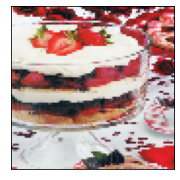

In [ ]:
plt.figure(figsize=(6,3))
plt.xticks([])
plt.yticks([])
plt.imshow(combined_val_images[9999])

In [ ]:
train_labels = np.zeros(combined_train_images.shape[0])
val_labels = np.zeros(combined_val_images.shape[0])
test_labels = np.zeros(combined_test_images.shape[0])
val = 0
for i in range(int(combined_train_images.shape[0]/400)):
  train_labels[(i * train_slice) : (i * train_slice) + train_slice] = val
  val = val + 1

val = 0
for i in range(int(combined_train_images.shape[0]/400)):
  val_labels[(i * val_slice) : (i * val_slice) + val_slice] = val
  test_labels[(i * test_slice) : (i * test_slice) + test_slice] = val
  val = val + 1

test_labels[9000:10000]

In [ ]:
from numpy import argmax
from tensorflow.keras.utils import to_categorical
# one hot encode
train_labels_encoded = to_categorical(train_labels)
val_labels_encoded = to_categorical(val_labels)
test_labels_encoded = to_categorical(test_labels)
print(train_labels_encoded.shape)
print(val_labels_encoded.shape)
print(test_labels_encoded.shape)

(40000, 100)
(10000, 100)
(10000, 100)


In [ ]:
from tensorflow.keras import applications
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout, GlobalMaxPooling2D

base_model = applications.resnet50.ResNet50(weights= None, include_top=False, input_shape= (84,84,3))
x = base_model.output
x = GlobalMaxPooling2D()(x)
x = Dropout(0.7)(x)
predictions = Dense(100, activation= 'softmax')(x)
model = Model(inputs = base_model.input, outputs = predictions)
optimizer = tf.keras.optimizers.Adam(learning_rate)
model.compile(optimizer= optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(combined_val_images, val_labels_encoded, epochs = 100)


Epoch 1/100
313/313 [==============================] - 23s 56ms/step - loss: 8.7343 - accuracy: 0.0107
Epoch 2/100
313/313 [==============================] - 17s 55ms/step - loss: 7.4603 - accuracy: 0.0120
Epoch 3/100
313/313 [==============================] - 17s 55ms/step - loss: 7.1911 - accuracy: 0.0111
Epoch 4/100
313/313 [==============================] - 17s 55ms/step - loss: 6.6225 - accuracy: 0.0132
Epoch 5/100
313/313 [==============================] - 17s 55ms/step - loss: 6.3055 - accuracy: 0.0145
Epoch 6/100
313/313 [==============================] - 17s 55ms/step - loss: 6.3199 - accuracy: 0.0130
Epoch 7/100
313/313 [==============================] - 17s 55ms/step - loss: 6.0657 - accuracy: 0.0174
Epoch 8/100
313/313 [==============================] - 17s 55ms/step - loss: 5.9919 - accuracy: 0.0249
Epoch 9/100
313/313 [==============================] - 17s 55ms/step - loss: 5.9232 - accuracy: 0.0285
Epoch 10/100
313/313 [==============================] - 17s 55ms/step - l

In [ ]:
preds = model.evaluate(combined_test_images, test_labels_encoded)
print ("Loss = " + str(preds[0]))
print ("Test Accuracy = " + str(preds[1]))

InternalError: ignored